# DETECCIÓN DE FRAUDE FELIPE

### FASE 1:
Comenzamos el ejercicio definiendo un objetivo, en este caso, nuestro objetivo es predecir si un cliente es fraude o no.

FASE 2:

Recopilación y preparación de datos

En este caso, como hay uchas columnas estaría bien dedicar un tiempo a conocer y entender cada una de estas. Adjunto una tabla en la que hago una breve descripción de cada una de las variables.

<img src="../docs/capturatabla.png">

In [1]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el conjunto de datos
filename = "../data/Base.csv"
data = pd.read_csv(filename)

In [3]:
#Para ver si el conjunto de datos se ha cargado bien ponemos por pantalla las primeras 10 filas
data.head(10)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   
5           0     0.6               0.294840                         -1   
6           0     0.2               0.773085                         22   
7           0     0.8               0.153880                         -1   
8           0     0.3               0.523655                         21   
9           0     0.8               0.834475                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   
5                           369            30            0.024232   
6                             4            40            0.006919   
7                           103            40            0.045122   
8                             2            30            0.035206   
9                           134            20            0.017245   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...                0   
1               -0.849551           AD          1658  ...                0   
2               -1.490386           AB          1095  ...                0   
3               -1.863101           AB          3483  ...                0   
4               47.152498           AA          2339  ...                0   
5               -1.232556           AD          1204  ...                0   
6               -0.544676           AB          1998  ...                0   
7               -1.101184           AB          1548  ...                1   
8               -0.955737           AB          1781  ...                0   
9               -1.356393           AD          3113  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                 1500.0                0  INTERNET   
1                 1500.0                0  INTERNET   
2                  200.0                0  INTERNET   
3                  200.0                0  INTERNET   
4                  200.0                0  INTERNET   
5                  200.0                0  INTERNET   
6                  200.0                0  INTERNET   
7                  200.0                0  INTERNET   
8                  200.0                0  INTERNET   
9                 1500.0                0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                   1   
1                   3.363854     other                   1   
2                  22.730559   windows                   0   
3                  15.215816     linux                   1   
4                   3.743048     other                   0   
5                   6.987316     linux                   1   
6                  28.199923       x11                   1   
7                  11.234264     other                   1   
8                   5.329387     other                   1   
9                   4.103970     other                   1   

   device_distinct_emails_8w device_fraud_count  month  
0                          1                  0      0  
1                          1                  0      0  
2                          1                  0      0  
3                          1             

In [4]:
#Veamos un breve resumen de la información del conjunto de datos
data.info()
#Así podemos ver que todas las columnas están completas y también podemos ver el tipo de varibale de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [52]:
#Comprobamos si hay algún valor nulo en cada columna
data.isnull().sum()
#Comprobamos que no hay ninguno

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [53]:
#Comprobamos si hay alguún dato duplicado
print("Datos duplicados:",data.duplicated().sum())

Datos duplicados: 0


In [54]:
#Y ahora veamos una breve descripción numérica de los datos
data.describe().T

count         mean          std  \
fraud_bool                        1000000.0     0.011029     0.104438   
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    16.718568    44.046230   
current_address_months_count      1000000.0    86.587867    88.406599   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    10.839303    12.116875   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.544940     8.033106   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018312     0.180761   
device_fraud_count                1000000.0     0.000000     0.000000   
month                             1000000.0     3.288674     2.209994   

                                           min          25%          50%  \
fraud_bool                        0.000000e+00     0.000000     0.000000   
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.434550e-06     0.225216     0.492153   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007193     0.015176   
intended_balcon_amount           -1.553055e+01    -1.181488    -0.830507   
zip_count_4w                      1.000000e+00   894.000000  1263.000000   
velocity_6h                      -1.706031e+02  3436.365848  5319.769349   
velocity_24h                      1.300307e+03  3593.179135  4749.921161   
velocity_4w                       2.825748e+03  4268.368423  4913.436941   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     6.000000     9.000000   
credit_risk_score                -1.700000e+02    83.000000   122.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                -1.000000e+00    -1.000000     5.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes        -1.000000e+00     3.103053     5.114321   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w        -1.000000e+00     1.000000     1.000000   
device_fraud_coun

In [55]:
#En el describe anterior parece que la columnas "device_fraud_count" tiene todos los valores nulos. Comprobemoslo:
data['device_fraud_count'].value_counts()

device_fraud_count
0    1000000
Name: count, dtype: int64

In [5]:
#Podemos ver que sí y por lo tanto eliminamos la columna completa porque no es necesario para entrenar el modelo
data = data.drop(['device_fraud_count'],axis=1)
data.shape

(1000000, 31)

In [5]:
#Veamos cuantos de nuestros datos son fraudes y cuantos no
n_fraude = pd.DataFrame(data['fraud_bool'].value_counts())
n_fraude

count
fraud_bool        
0           988971
1            11029

In [7]:
#Hay un claro desbalance enrte nuestros datos y tendremos que tenerlo en cuenta para cuanto lo entrenemos más adelante

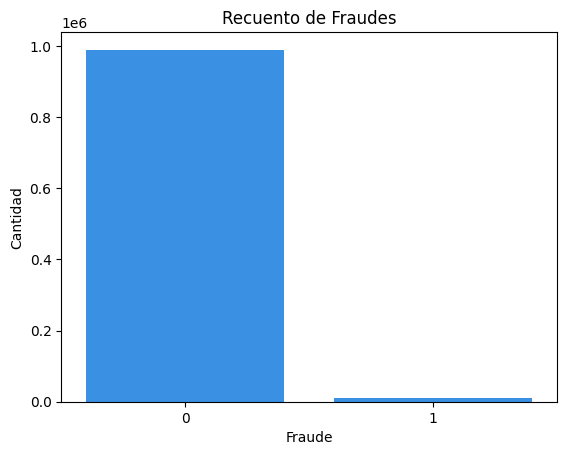

In [6]:
#Por último veamos gráficamente cómo es el desbalance de nuestros datos
Y = data['fraud_bool']
sns.countplot(x=Y,color='dodgerblue')

# Personalizar el gráfico (opcional)
plt.title("Recuento de Fraudes")
plt.xlabel("Fraude")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

FASE 3: Visualización de datos
En esta fase vamos a ver como se distribuyen cada una de las variables.

Comenzamos haciendo un histograma para cada una de las columnas que no son categóricas.
Para ello definiremos una función y la utilizaremos para dibujar cada histograma en cada una de las celdas de la matriz.

In [17]:
def hist_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.histplot(df[column], ax=axes[row, col],color='steelblue')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

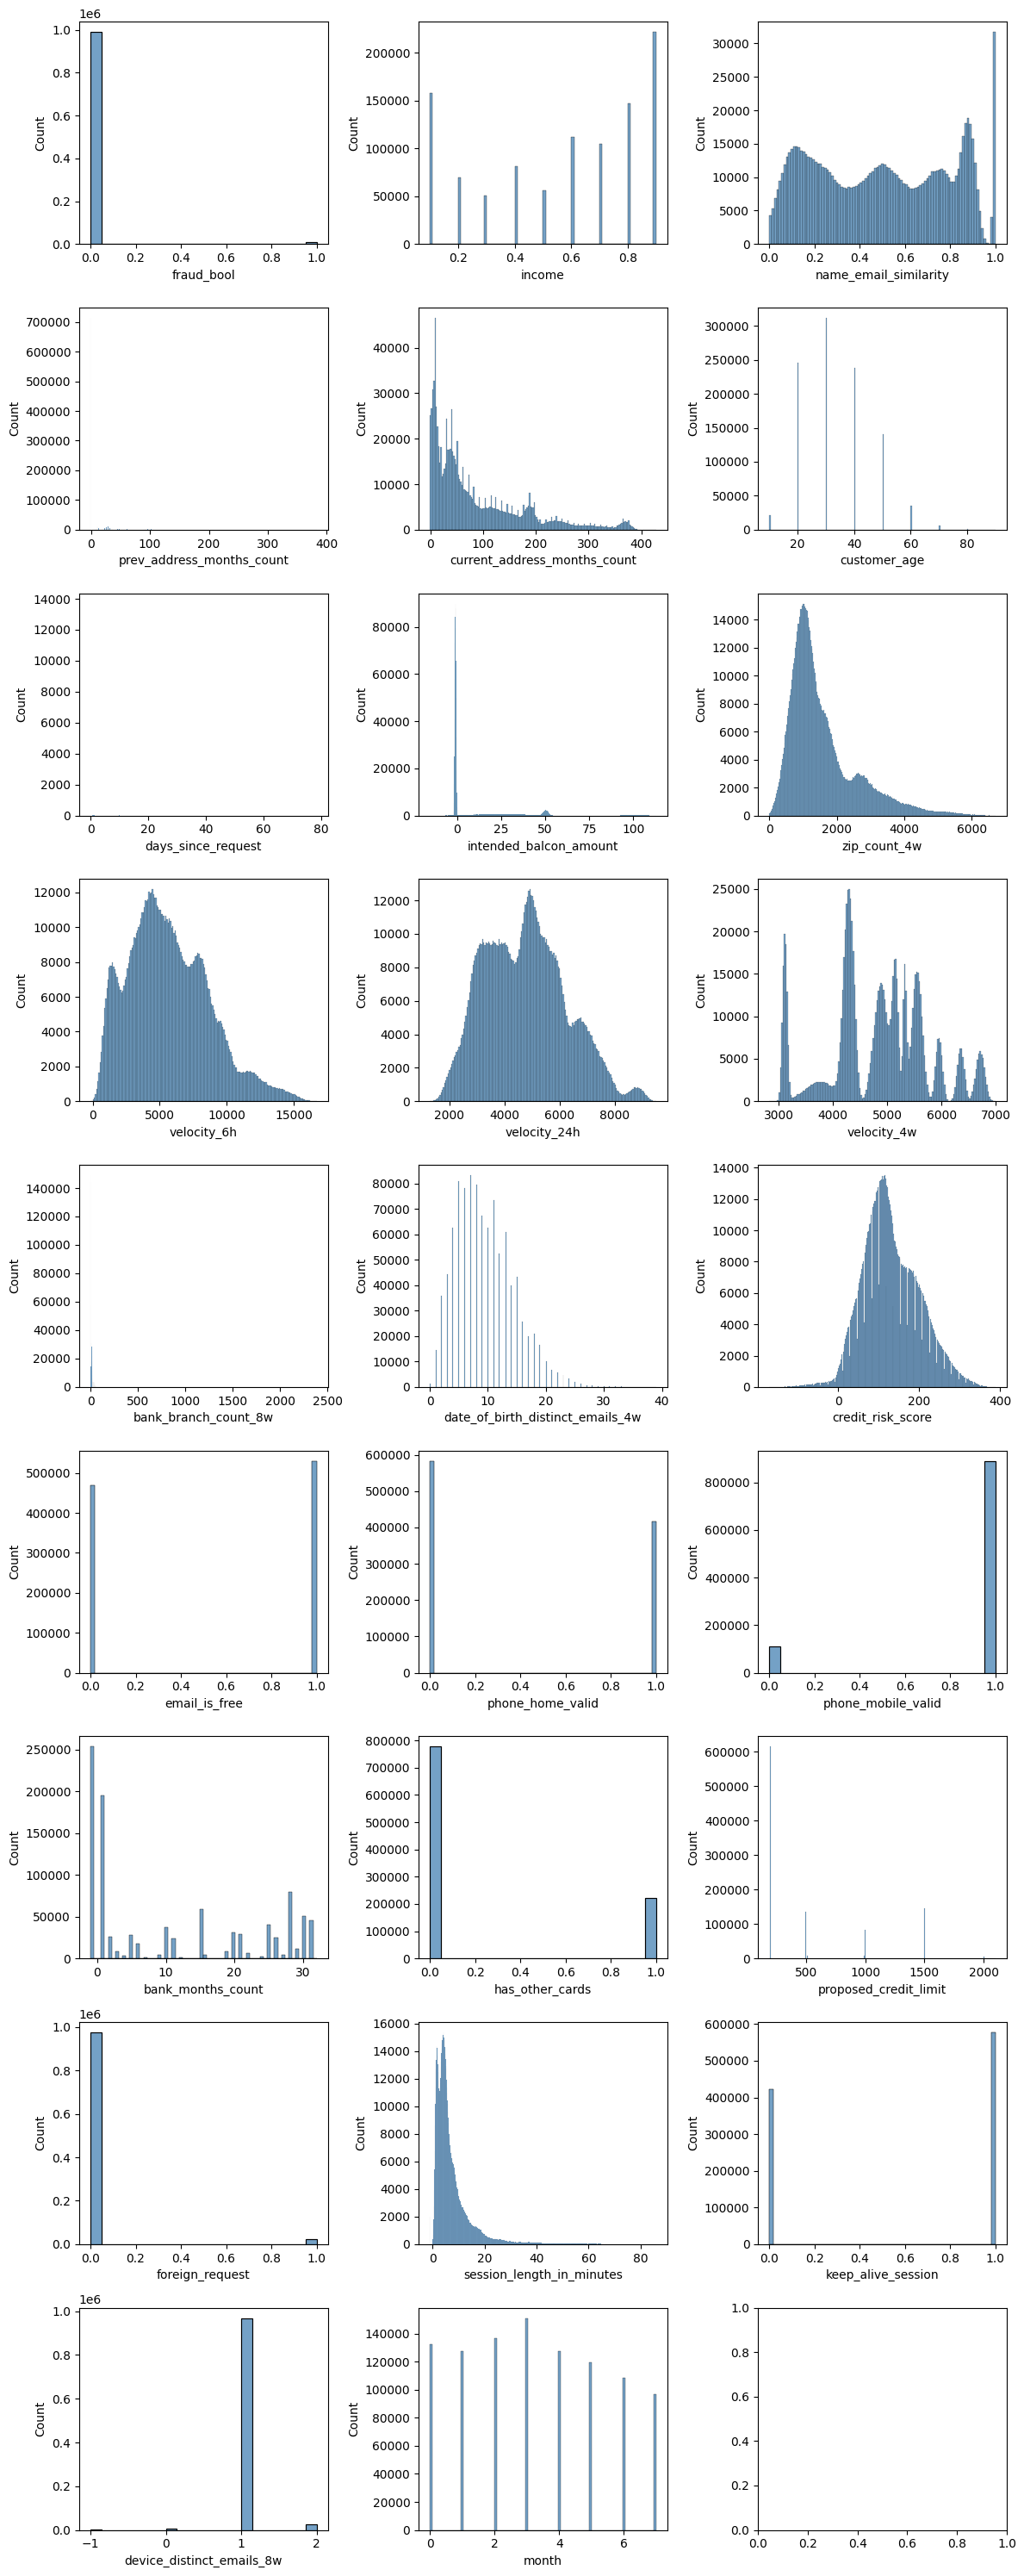

In [18]:
hist_plot(data)

In [19]:
def kde_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.kdeplot(df[column], ax=axes[row, col],color='steelblue')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

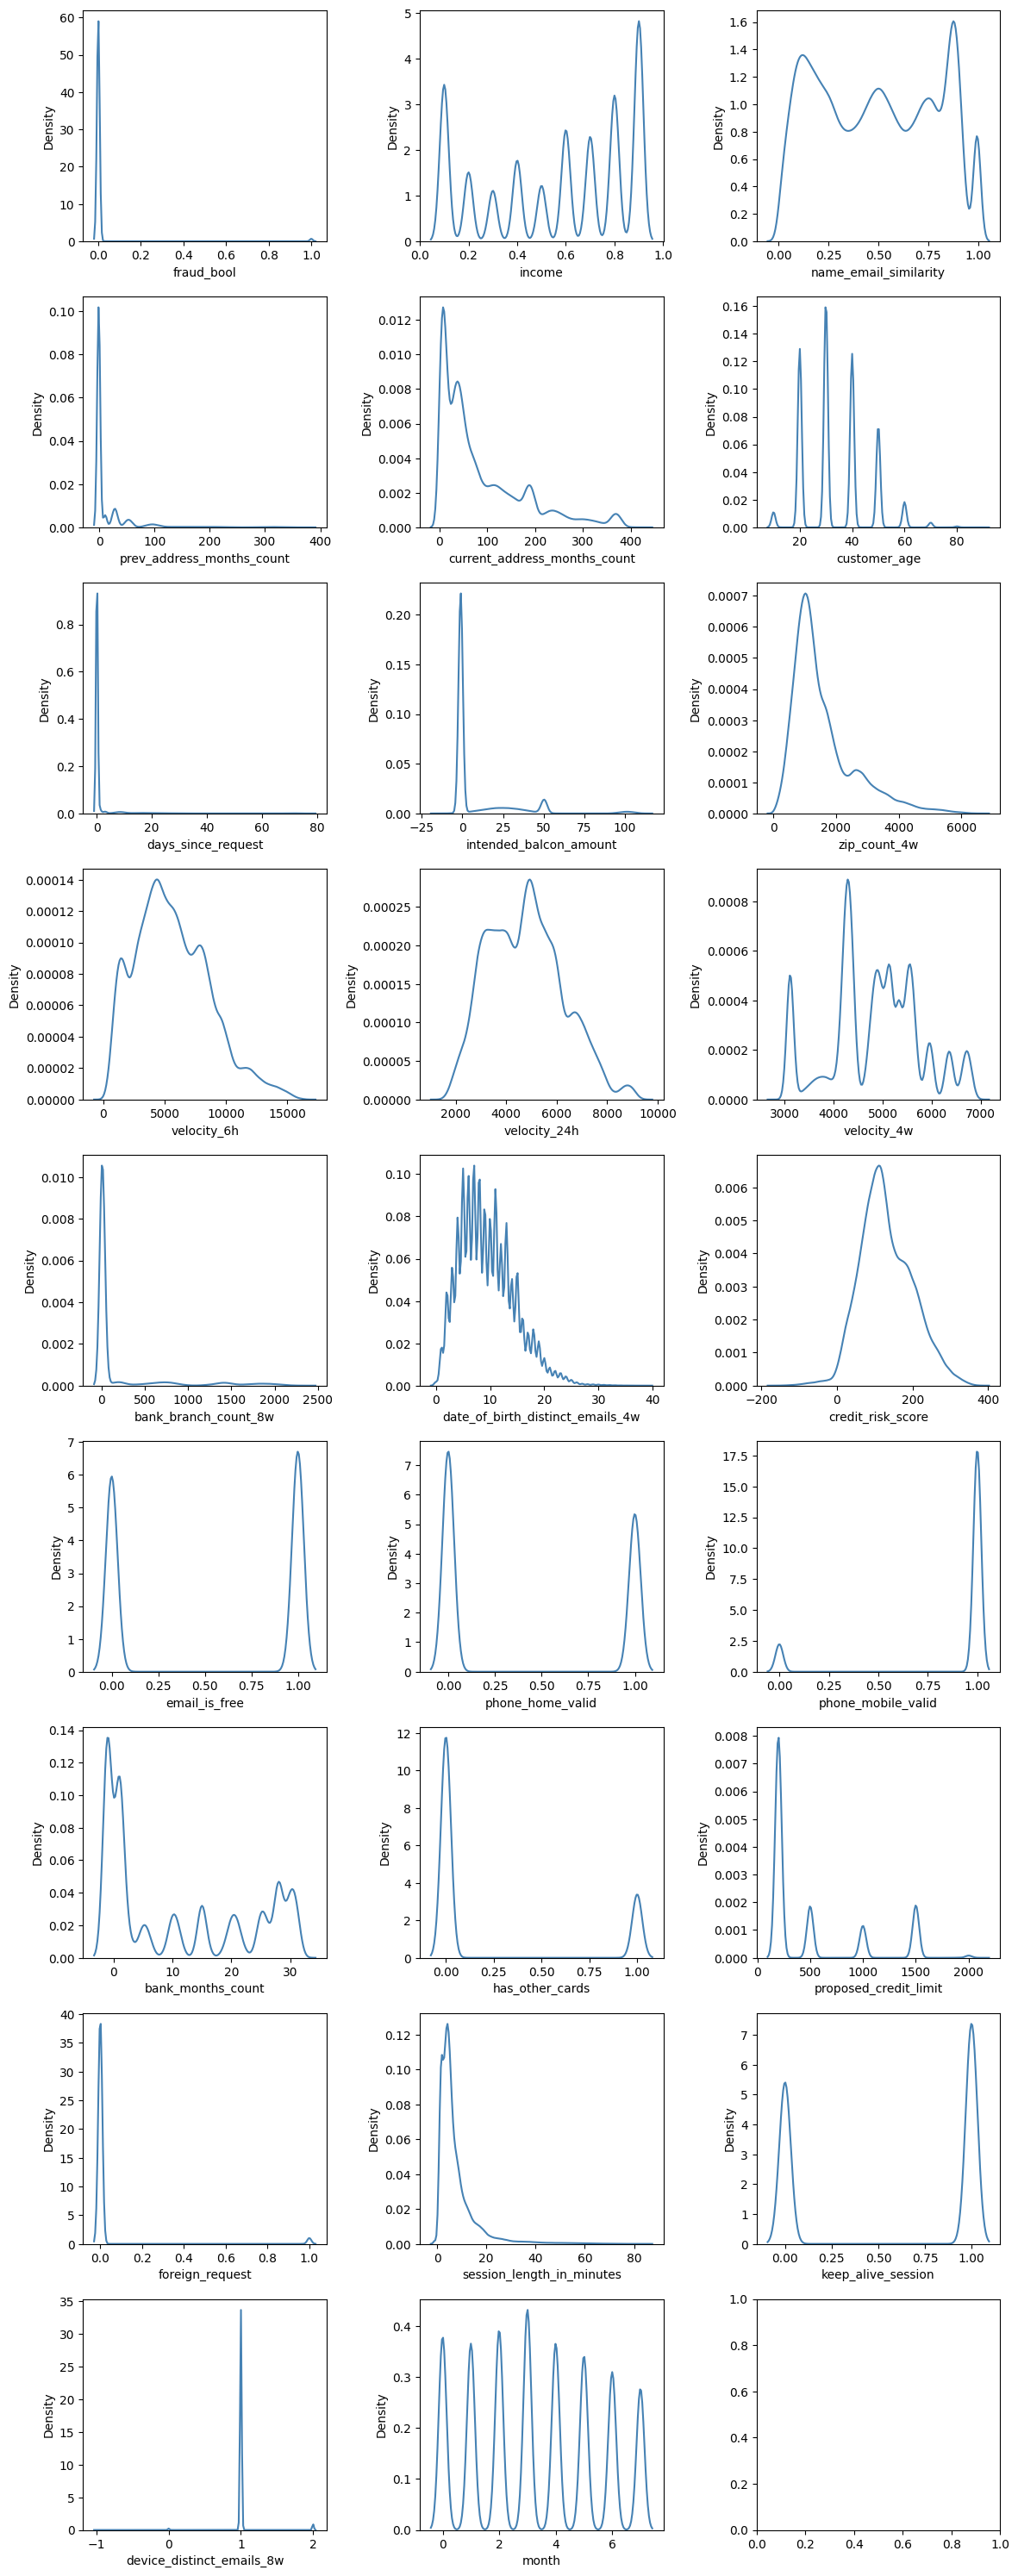

In [20]:
kde_plot(data)

In [21]:
def box_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.boxplot(df[column], ax=axes[row, col],color='steelblue')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

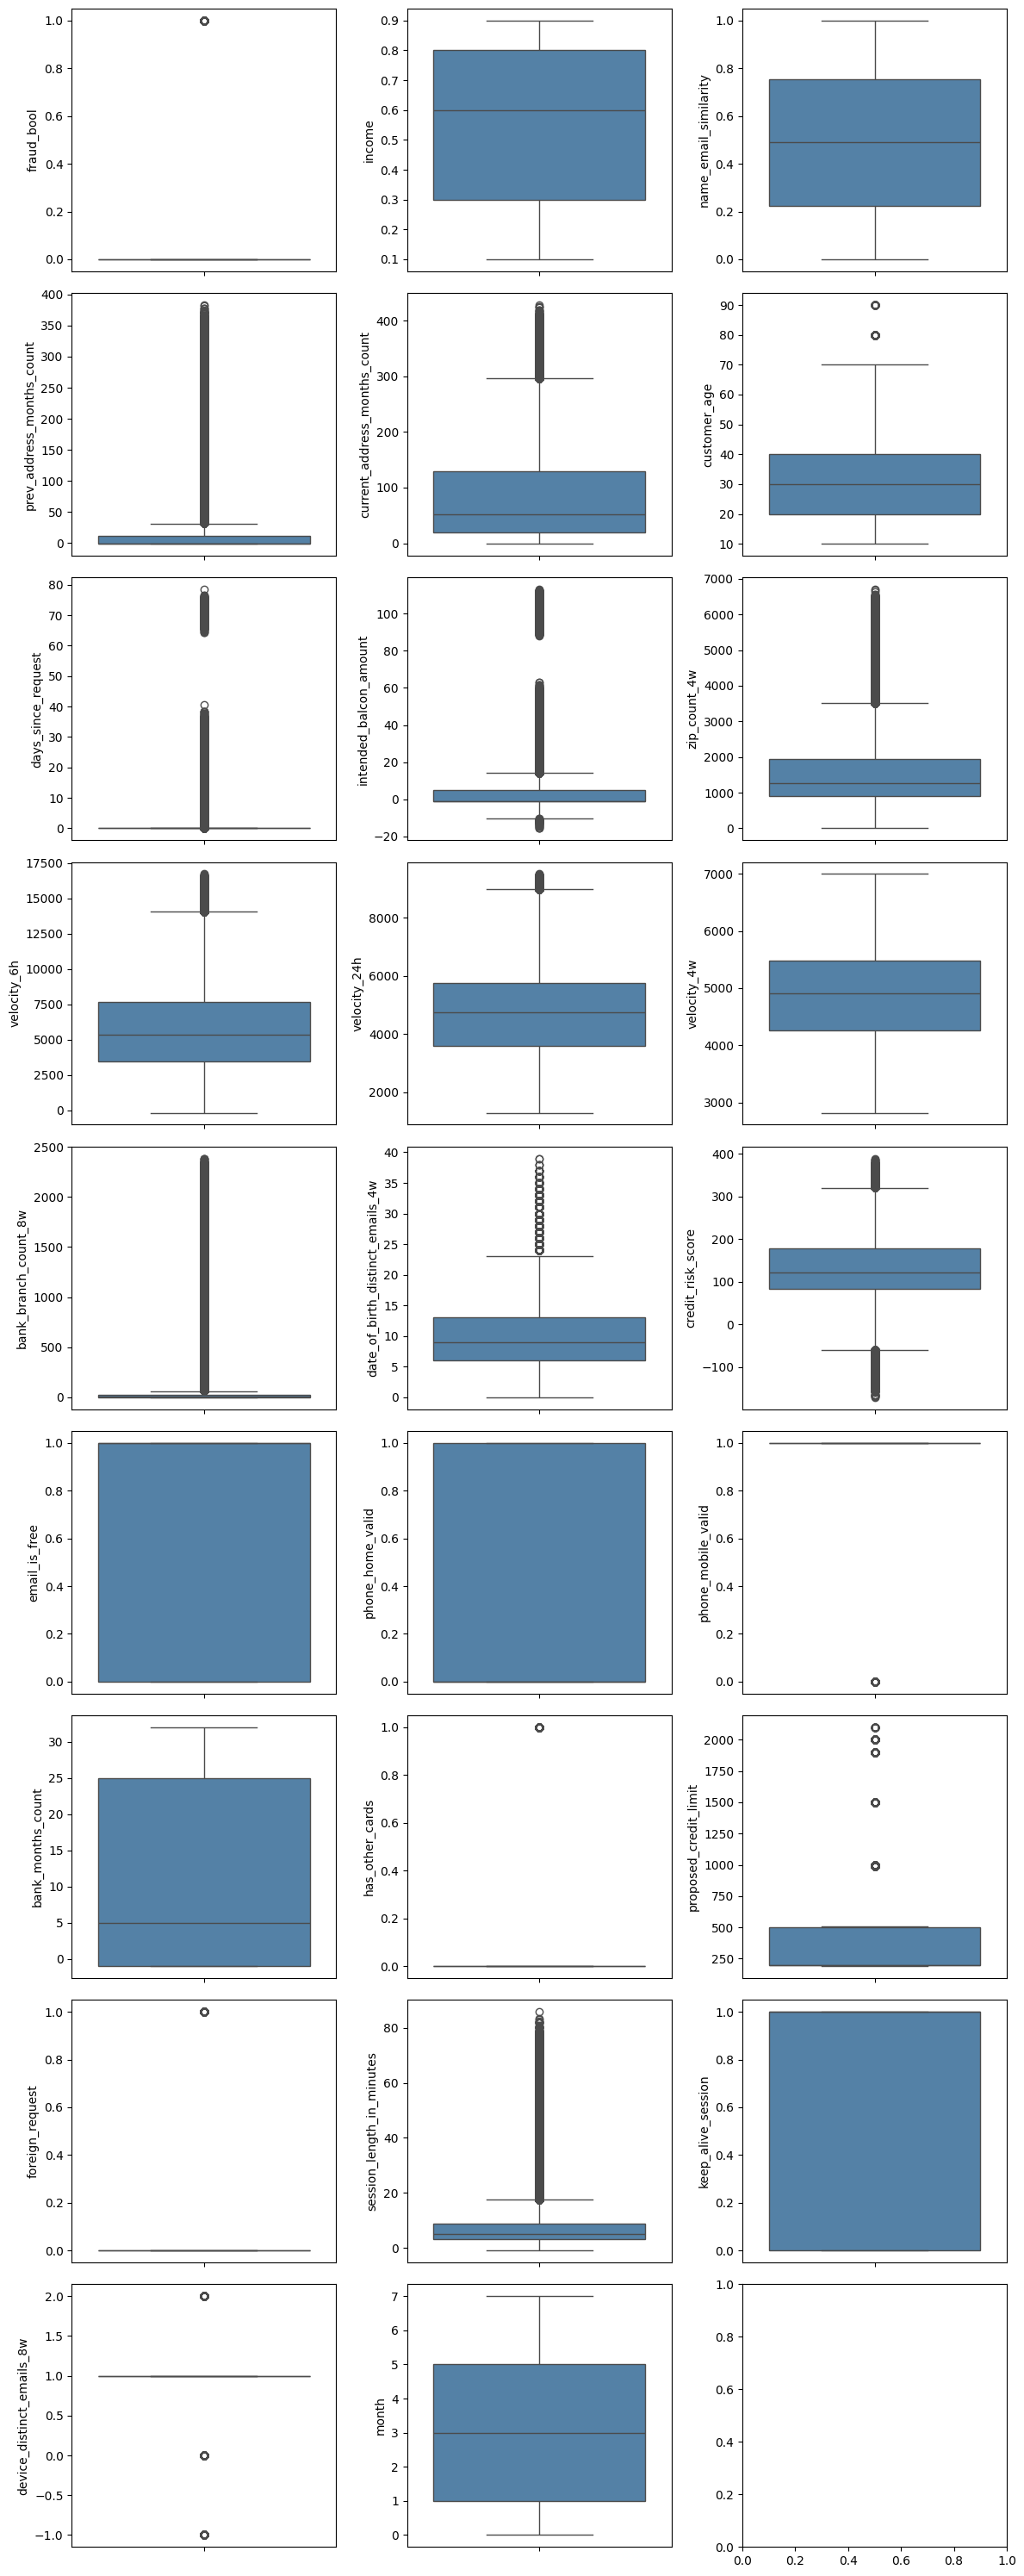

In [22]:
box_plot(data)

También vamos a comparar como se cmportan las columnas categoricas y algunas de las discretas según el cinjunto de datos completo y también en realcaión con los datos los cuales son fraudes.

In [7]:
a = data[data['fraud_bool']==1]
a

fraud_bool  income  name_email_similarity  prev_address_months_count  \
43               1     0.9               0.570800                         -1   
140              1     0.1               0.993219                         -1   
284              1     0.8               0.794351                         -1   
314              1     0.7               0.090000                         -1   
561              1     0.9               0.998248                         31   
...            ...     ...                    ...                        ...   
999862           1     0.3               0.346834                         -1   
999879           1     0.7               0.161950                        289   
999923           1     0.4               0.098119                         -1   
999938           1     0.8               0.830047                         -1   
999974           1     0.5               0.880055                         -1   

        current_address_months_count  customer_age  days_since_request  \
43                               157            60            0.005908   
140                               67            20            0.015331   
284                              376            60           17.925951   
314                               58            50            0.004134   
561                               45            30            0.010165   
...                              ...           ...                 ...   
999862                            13            20            0.007084   
999879                           209            40            0.008195   
999923                           139            30            0.028858   
999938                            73            40            0.009757   
999974                            63            20            0.021952   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
43                   35.337538           AA          4079  ...   
140                  92.120139           AA          1192  ...   
284                  41.422110           AA           815  ...   
314                  -1.244047           AD          4011  ...   
561                  33.067538           AA           525  ...   
...                        ...          ...           ...  ...   
999862               -0.994025           AC           692  ...   
999879               -0.837462           AC           679  ...   
999923               -1.383748           AB           345  ...   
999938               -1.439571           AC           623  ...   
999974               -0.480327           AB           398  ...   

        bank_months_count  has_other_cards  proposed_credit_limit  \
43                     30                0                 1500.0   
140                    25                0                 1500.0   
284                    28                0                 1500.0   
314                    27                0                 1500.0   
561                     1                1                 2000.0   
...                   ...              ...                    ...   
999862                 -1                0                  200.0   
999879                 -1                0                 2000.0   
999923                  1                0                  500.0   
999938                 -1                0                 1900.0   
999974                 31                0                  200.0   

        foreign_request    source session_length_in_minutes  device_os  \
43                    0  INTERNET                  4.036394    windows   
140                   0  INTERNET                 12.928072    windows   
284                   0  INTERNET                  2.550167      linux   
314                   0  INTERNET                  3.500856    windows   
561                   0  INTERNET                 44.536211    windows   
...                 ...       ...                       ...        ...   
999862            

In [24]:
def plot_categorical_columns(df,a):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_rows = len(categorical_columns)
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=df, ax=axes[i, 0],color='salmon')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Recuento')
        axes[i, 0].set_title(f'Recuento de {column}')
        sns.countplot(x=column, data=a, ax=axes[i, 1],color='salmon')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Recuento')
        axes[i, 1].set_title(f'Recuento de los fraudes de {column}')

    plt.tight_layout()
    plt.show()

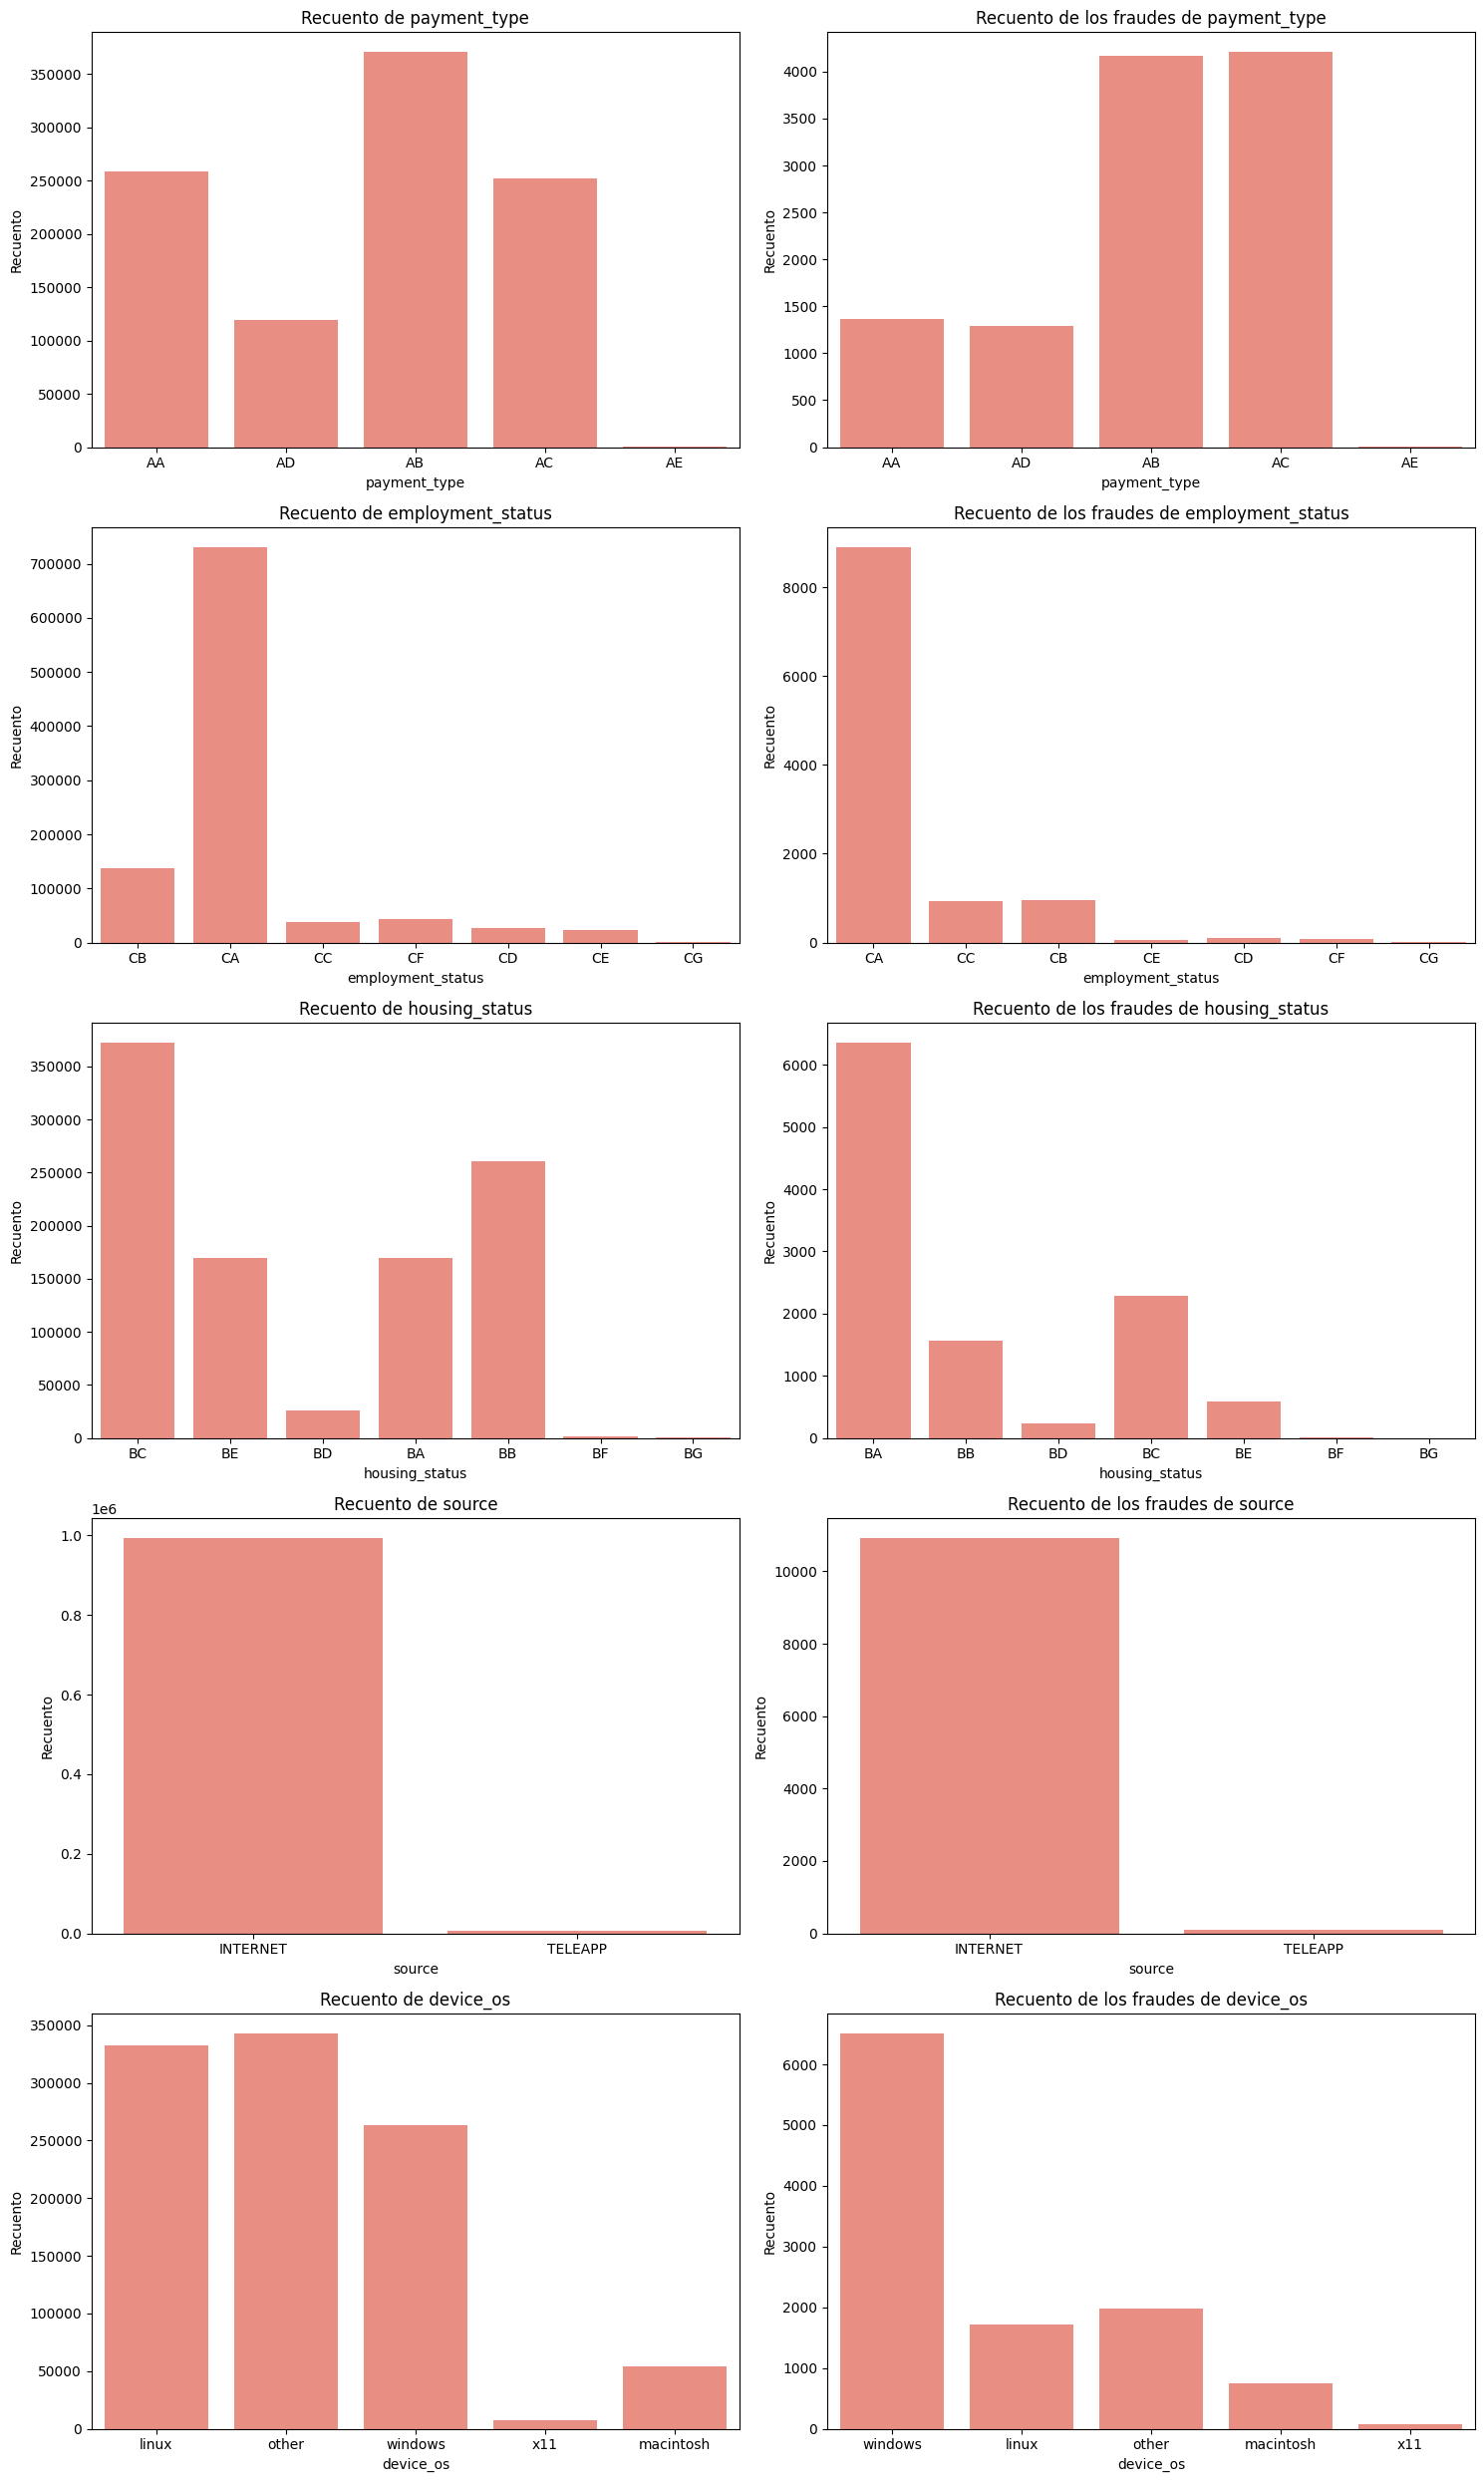

In [25]:
plot_categorical_columns(data,a)

En esta comparación es llamativo, por ejemplo, en la columna de "hosuing_status" que mientras en el conjunto de datos los solicitantes con estado residencial actual BA es delos que menos hay(15%), sin embargo, si lo vemos en comparación solo con los solicitantes que resultaron fraudulentos vemos que son la mayoría(55%).

In [26]:
lista_plot=[ 'customer_age', 'date_of_birth_distinct_emails_4w',
       'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'has_other_cards',
       'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w',
       'month']

In [27]:
def plot_discret_columns(df,a):
    
    num_rows = len(lista_plot)
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

    for i, column in enumerate(lista_plot):
        sns.countplot(x=column, data=df, ax=axes[i, 0],color='salmon')
        axes[i, 0].set_xlabel(column)
        axes[i, 0].set_ylabel('Recuento')
        axes[i, 0].set_title(f'Recuento de {column}')
        sns.countplot(x=column, data=a, ax=axes[i, 1],color='salmon')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel('Recuento')
        axes[i, 1].set_title(f'Recuento de los fraudes de {column}')

    plt.tight_layout()
    plt.show()

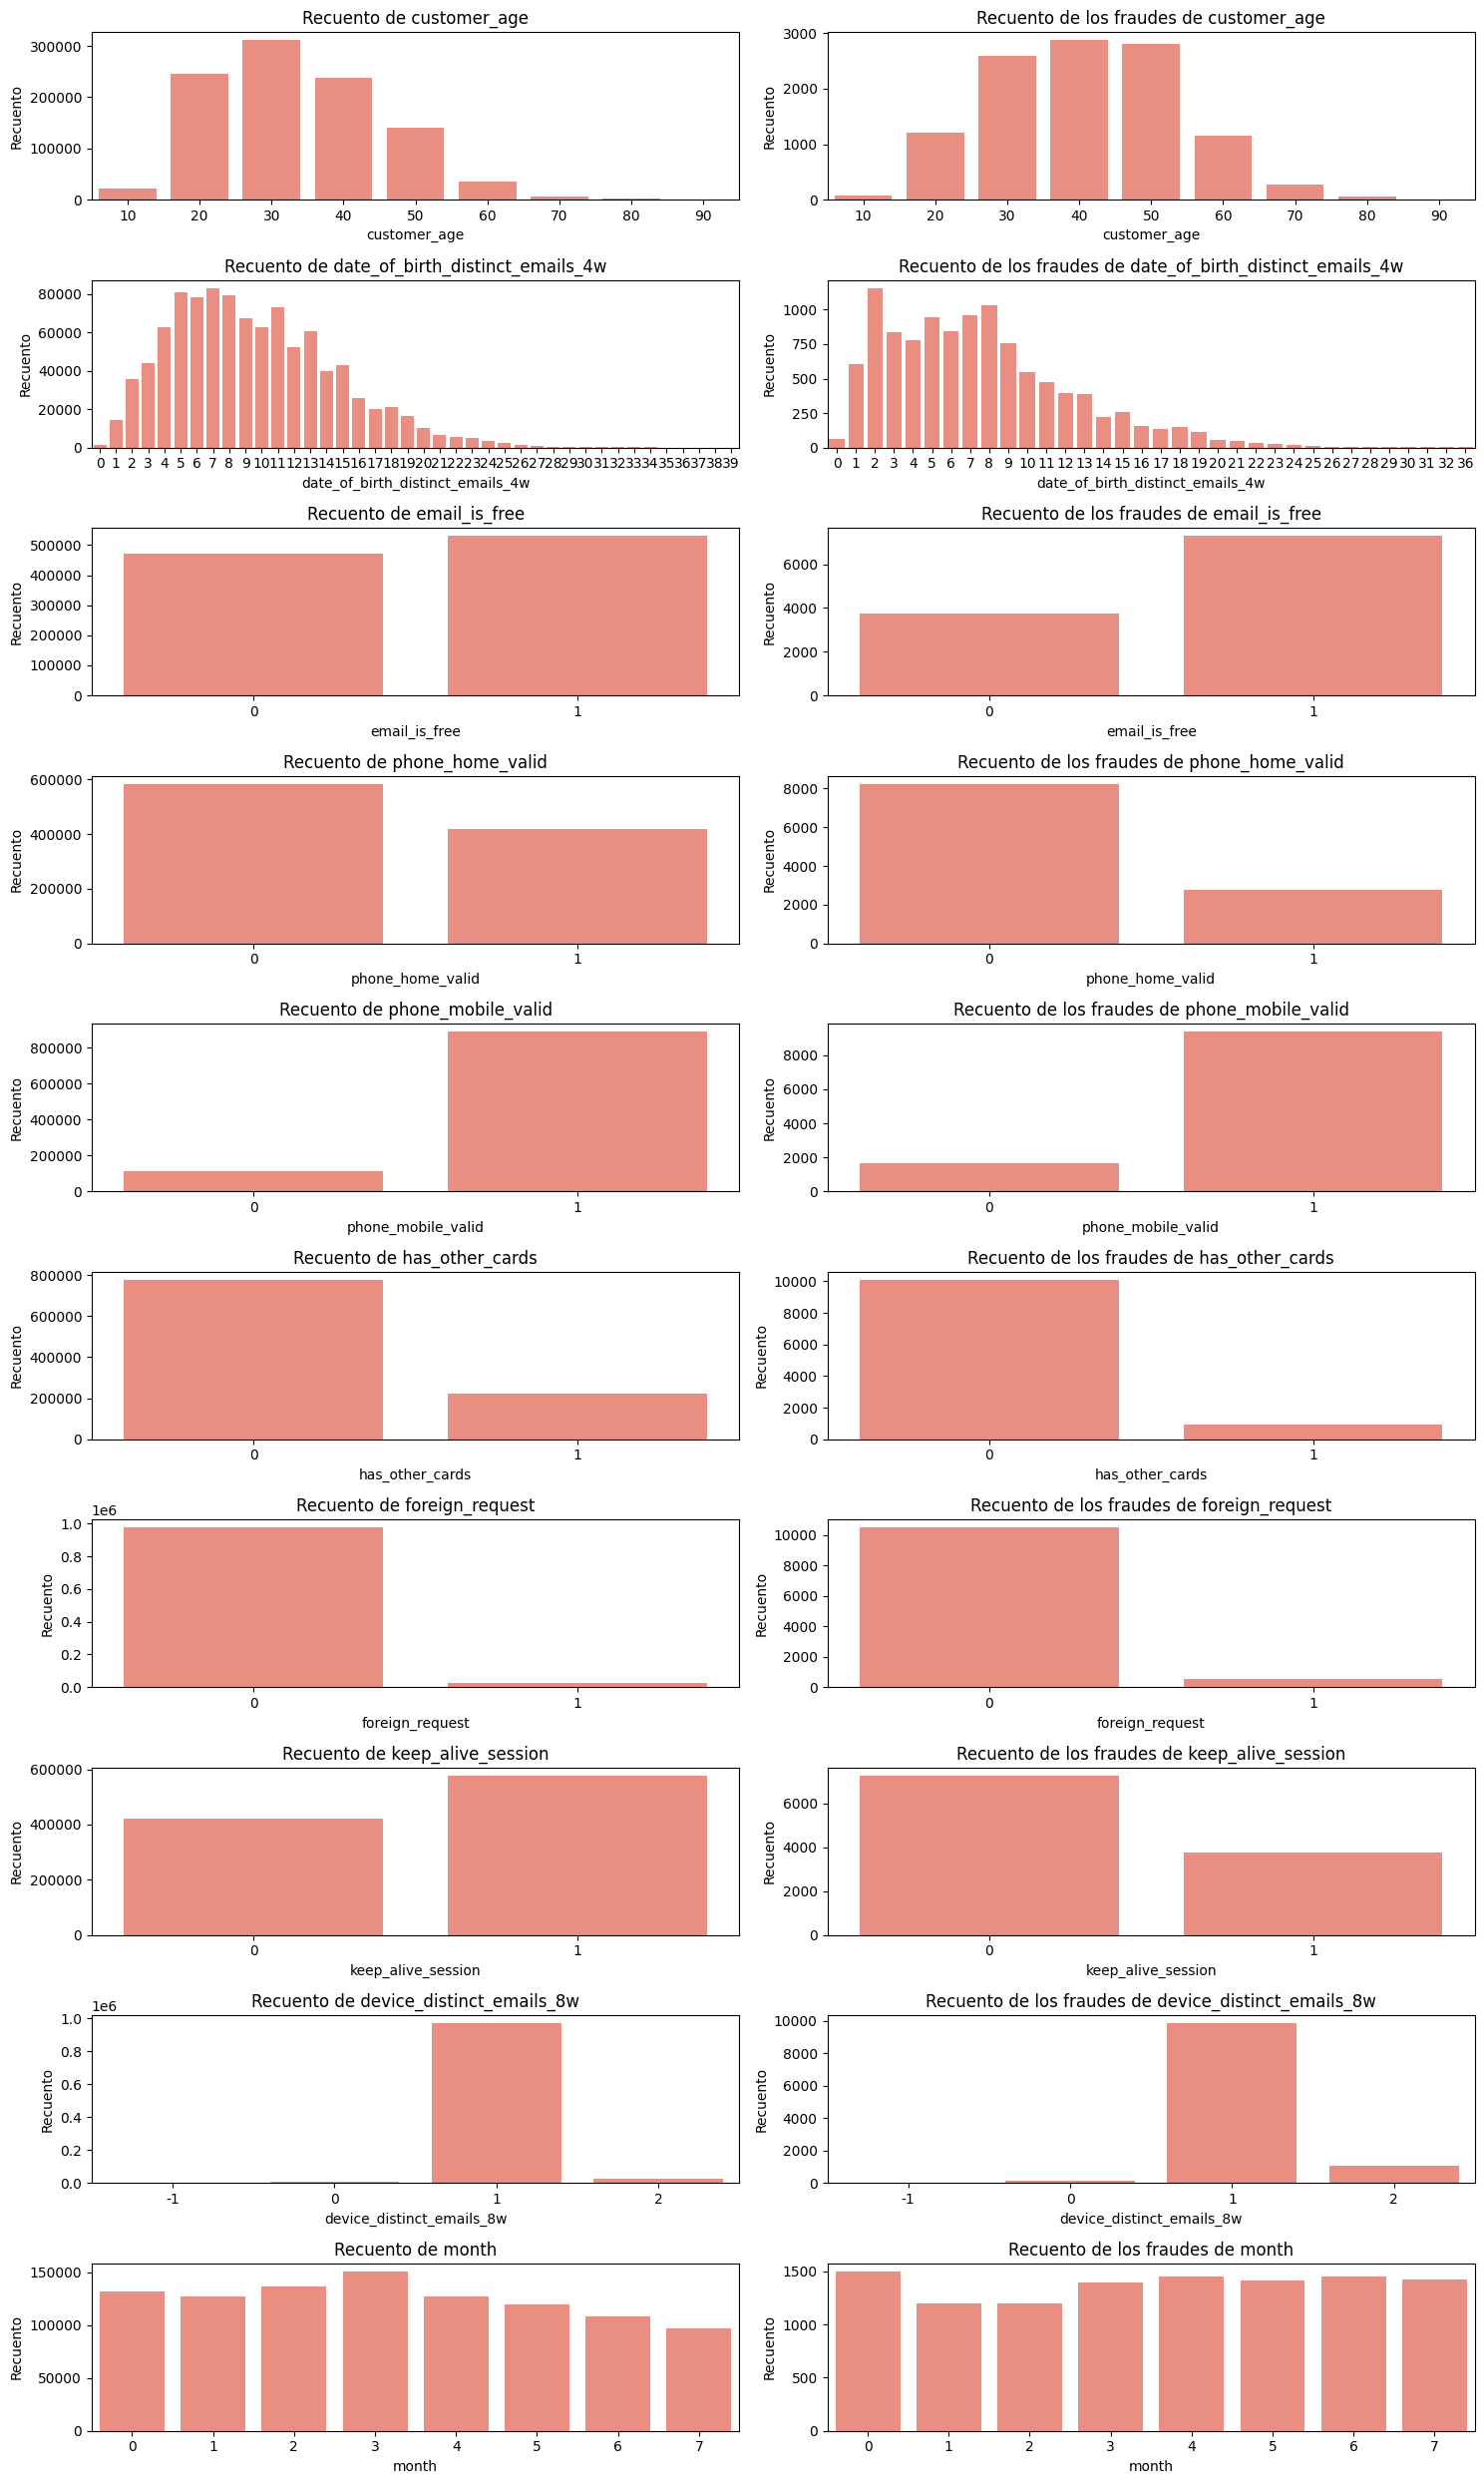

In [28]:
plot_discret_columns(data,a)

También veamos en un primer lugar la matriz de correlación para cuanta correlación hay entre nuestros datos

In [59]:
#Para ver la matriz de correlación vamos a quitar las variables tipo objeto
# Lista de columnas a eliminar
columnas_a_eliminar = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Creo un nuevo dataFrame con las columnas eliminadas
data_sin_object = data.drop(columns=columnas_a_eliminar)

# Verifico el DataFrame después de eliminar las columnas
data_sin_object.head(10)

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   
5           0     0.6               0.294840                         -1   
6           0     0.2               0.773085                         22   
7           0     0.8               0.153880                         -1   
8           0     0.3               0.523655                         21   
9           0     0.8               0.834475                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   
5                           369            30            0.024232   
6                             4            40            0.006919   
7                           103            40            0.045122   
8                             2            30            0.035206   
9                           134            20            0.017245   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  phone_home_valid  \
0              102.453711          1059  13096.035018  ...                 0   
1               -0.849551          1658   9223.283431  ...                 1   
2               -1.490386          1095   4471.472149  ...                 0   
3               -1.863101          3483  14431.993621  ...                 0   
4               47.152498          2339   7601.511579  ...                 1   
5               -1.232556          1204  11556.955514  ...                 1   
6               -0.544676          1998  11723.993606  ...                 1   
7               -1.101184          1548   4999.555801  ...                 1   
8               -0.955737          1781   6979.994002  ...                 1   
9               -1.356393          3113   7549.992086  ...                 1   

   phone_mobile_valid  bank_months_count  has_other_cards  \
0                   1                  9                0   
1                   1                  2                0   
2                   1                 30                0   
3                   1                  1                0   
4                   1                 26                0   
5                   1                 30                0   
6                   1                  1                0   
7                   1                 25                1   
8                   0                  2                0   
9                   1                 15                0   

   proposed_credit_limit  foreign_request  session_length_in_minutes  \
0                 1500.0                0                  16.224843   
1                 1500.0                0                   3.363854   
2                  200.0                0                  22.730559   
3                  200.0                0                  15.215816   
4                  200.0                0                   3.743048   
5                  200.0                0                   6.987316   
6                  200.0                0                  28.199923   
7                  200.0                0                  11.234264   
8                  200.0                0                   5.329387   
9                 1500.0                0                   4.103970   

   keep_alive_session  device_distinct_emails_8w  month  
0            

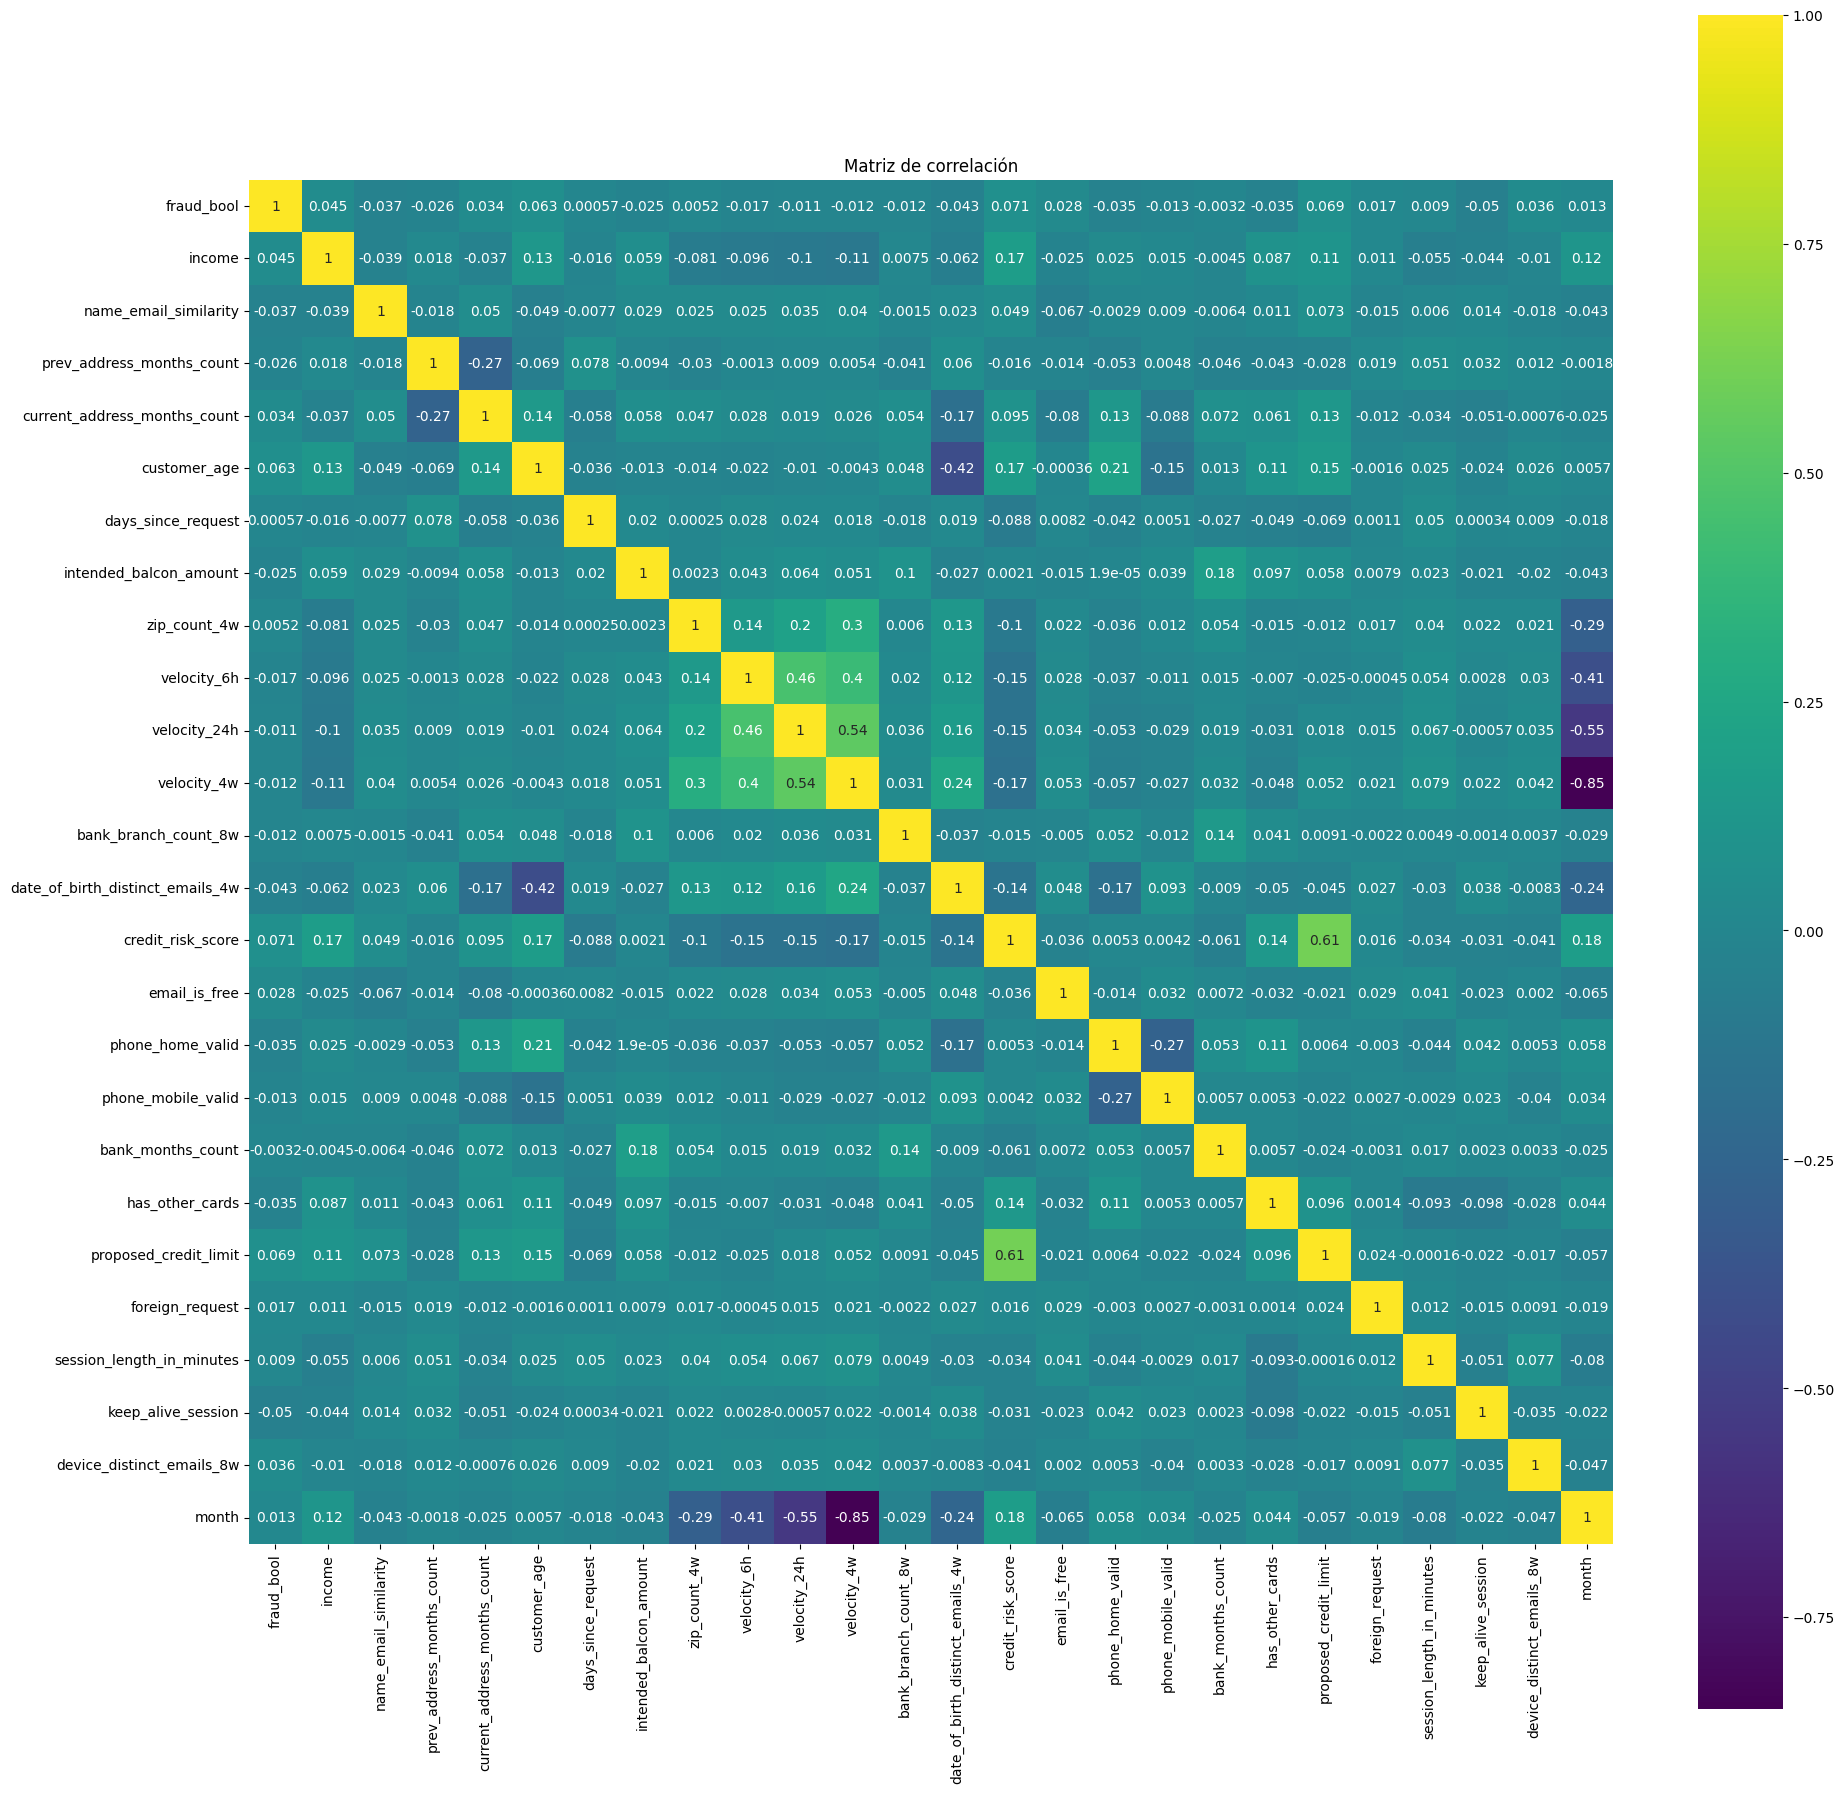

In [60]:
%matplotlib inline
#Matriz de corelacion matplotlib
correlation = data_sin_object.corr()
plt.figure(figsize=(22,22))
ax = sns.heatmap(correlation,vmin=-0.85, vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

A priori la única relación alta la hay entre las columnas "velocity_4w" y "month" por ello eliminaré la columna "velocity_4w".

In [6]:
#Podemos ver que sí y por lo tanto eliminamos la columna completa porque no es necesario para entrenar el modelo
data = data.drop(['velocity_4w'],axis=1)
data.shape

(1000000, 30)

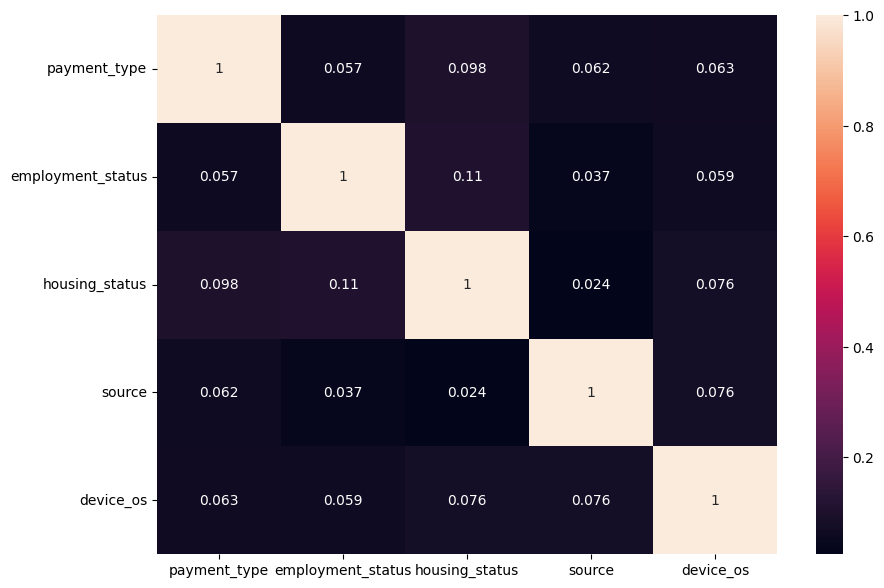

In [62]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_columns = data.select_dtypes(include=['object']).columns
cramers_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in categorical_columns:
    for j in categorical_columns:
        cramers_matrix.loc[i, j] = cramers_v(data[i], data[j])

plt.figure(figsize=(10, 7))
sns.heatmap(cramers_matrix.astype(float), annot=True)
plt.show()


Podemos comprobar que no hay casi correlación entre las variables categóricas.

A continuación haremos udo de OneHotEncoder para las columnas categoricas, pues nos será necesario más adelante para trabajar con los modelos.

In [10]:
X=data.drop(['fraud_bool'],axis=1)
y=data['fraud_bool']

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,shuffle=True)

Shape of X: (1000000, 29)
Shape of y: (1000000,)


In [37]:
X_train.shape

(800000, 29)

In [41]:
X_train=X_train.reset_index(drop=True)

In [42]:
#one hot encoding using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded_train = encoder.fit_transform(X_train[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_train = pd.DataFrame(one_hot_encoded_train, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
train_encoded = pd.concat([X_train, one_hot_train], axis=1)

# Drop the original categorical columns
train_encoded = train_encoded.drop(categorical_columns, axis=1)


# Display the resulting dataframe
print(f"Encoded Employee data : \n{train_encoded}")

Encoded Employee data : 
        income  name_email_similarity  prev_address_months_count  \
0          0.6               0.430393                         -1   
1          0.8               0.526791                         10   
2          0.9               0.261854                         25   
3          0.3               0.234989                         -1   
4          0.7               0.388970                         34   
...        ...                    ...                        ...   
799995     0.2               0.239980                         -1   
799996     0.1               0.862807                         -1   
799997     0.7               0.496823                         50   
799998     0.1               0.850088                         55   
799999     0.2               0.756882                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 29            50            0.007139   
1         

In [44]:
train_encoded.head(20)

income  name_email_similarity  prev_address_months_count  \
0      0.6               0.430393                         -1   
1      0.8               0.526791                         10   
2      0.9               0.261854                         25   
3      0.3               0.234989                         -1   
4      0.7               0.388970                         34   
5      0.1               0.417593                         -1   
6      0.9               0.993716                         22   
7      0.1               0.878703                         11   
8      0.7               0.221928                         -1   
9      0.2               0.258522                         -1   
10     0.8               0.591136                         -1   
11     0.9               0.507566                         -1   
12     0.9               0.254511                         -1   
13     0.2               0.110713                         -1   
14     0.2               0.516086                         52   
15     0.3               0.886398                         -1   
16     0.4               0.901026                         85   
17     0.5               0.991187                         89   
18     0.6               0.479530                         -1   
19     0.8               0.412309                         -1   

    current_address_months_count  customer_age  days_since_request  \
0                             29            50            0.007139   
1                              6            40            0.024797   
2                             31            20           70.728204   
3                            112            40            0.001179   
4                             12            30            0.031244   
5                             38            40            0.015301   
6                              8            30            0.023317   
7                              4            20            0.008045   
8                             23            50            0.029497   
9                            133            40            0.010357   
10                           189            30            0.002396   
11                           385            40            0.005582   
12                           188            40            0.005860   
13                            40            40            0.012321   
14                            10            20            0.011450   
15                            93            40            0.033354   
16                             3            20            0.003936   
17                            13            30           71.540121   
18                           175            20            9.187545   
19                            24            20            0.014271   

    intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
0                -0.770661           548  6840.253749   5208.169800  ...   
1                -1.353757          3190  6464.371764   7830.345921  ...   
2                -1.404875           989  9299.042157   5436.987186  ...   
3                -0.730689          1227  4571.730988   3245.309667  ...   
4                16.776693          1120  5850.679056   4604.766939  ...   
5                -1.368188          1249  9334.186209   6114.691297  ...   
6                48.601249           748  2611.810064   4913.913953  ...   
7                -1.256807          1061  9357.613997   5568.994706  ...   
8                -0.646195           612  5120.631406   5185.149192  ...   
9                -1.444077          1172  1612.101787   2406.880905  ...   
10               17.136879          2565  3433.219229   6706.015901  ...   
11               -0.974666          1321  1295.826066   8905.270650  ...   
12               49.158641           342  5603.457839   3578.194354  ...   
13               -1.451443          1076  4281.208036   2944.150914  ...   
14               -0.868302          1068  5966.2

In [45]:
X_test = X_test.reset_index(drop=True)

In [68]:
y_train = y_train.reset_index(drop=True)
y_testv = y_test.reset_index(drop=True)

In [46]:
#one hot encoding using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = X_test.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns

one_hot_encoded_test = encoder.fit_transform(X_test[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data

one_hot_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe

test_encoded = pd.concat([X_test, one_hot_test], axis=1)

# Drop the original categorical columns

test_encoded = test_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{test_encoded}")

Encoded Employee data : 
        income  name_email_similarity  prev_address_months_count  \
0          0.1               0.879216                         -1   
1          0.6               0.857586                         -1   
2          0.2               0.871257                         -1   
3          0.2               0.844386                         -1   
4          0.1               0.428755                         -1   
...        ...                    ...                        ...   
199995     0.6               0.728395                         -1   
199996     0.5               0.460383                         -1   
199997     0.4               0.731218                         -1   
199998     0.6               0.889546                         -1   
199999     0.2               0.645401                         11   

        current_address_months_count  customer_age  days_since_request  \
0                                 90            40            0.009005   
1         

In [47]:
#Comprobemos que se ha realizado bien
test_encoded.head()

income  name_email_similarity  prev_address_months_count  \
0     0.1               0.879216                         -1   
1     0.6               0.857586                         -1   
2     0.2               0.871257                         -1   
3     0.2               0.844386                         -1   
4     0.1               0.428755                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            90            40            0.009005   
1                            34            30            0.018432   
2                           233            50            0.003572   
3                           118            50            0.016426   
4                            56            20            0.016087   

   intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
0               41.048629          1083  1152.844779   6955.177430  ...   
1               15.536027          2514  6702.980154   4103.172344  ...   
2               -0.295622           991  3130.756088   4135.792367  ...   
3               -1.015800           579  8836.448311   5872.192220  ...   
4                6.060433          1811  9918.660366   8871.357570  ...   

   housing_status_BE  housing_status_BF  housing_status_BG  source_INTERNET  \
0                0.0                0.0                0.0              1.0   
1                0.0                0.0                0.0              1.0   
2                0.0                0.0                0.0              1.0   
3                0.0                0.0                0.0              1.0   
4                0.0                0.0                0.0              1.0   

   source_TELEAPP  device_os_linux  device_os_macintosh  device_os_other  \
0             0.0              0.0                  0.0              1.0   
1             0.0              1.0                  0.0              0.0   
2             0.0              1.0                  0.0              0.0   
3             0.0              1.0                  0.0              0.0   
4             0.0              0.0                  0.0              1.0   

   device_os_windows  device_os_x11  
0                0.0            0.0  
1                0.0            0.0  
2                0.0            0.0  
3                0.0            0.0  
4                0.0            0.0  

[5 rows x 50 columns]

In [49]:
test_encoded.shape

(200000, 50)

In [60]:
from sklearn.linear_model import LassoLarsCV
# Creamos un modelo Lasso con validación cruzada para seleccionar el mejor valor de alpha
lasso_lars_ic = LassoLarsCV(cv=5)
lasso_lars_ic.fit(train_encoded, y_train)

# Obtenemos el valor óptimo de alpha
alpha_optimo = lasso_lars_ic.alpha_

# Los coeficientes resultantes después de aplicar Lasso
coeficientes_lasso = lasso_lars_ic.coef_

# Examinamos los coeficientes para identificar las variables más importantes
print("Coeficientes Lasso:")
for nombre_variable, coef in zip(train_encoded.columns, coeficientes_lasso):
    print(f"{nombre_variable}: {coef:.5f}")

Coeficientes Lasso:
income: 0.00931
name_email_similarity: -0.01309
prev_address_months_count: -0.00005
current_address_months_count: 0.00001
customer_age: 0.00026
days_since_request: 0.00008
intended_balcon_amount: -0.00008
zip_count_4w: 0.00000
velocity_6h: -0.00000
velocity_24h: 0.00000
bank_branch_count_8w: -0.00000
date_of_birth_distinct_emails_4w: -0.00029
credit_risk_score: 0.00003
email_is_free: 0.00676
phone_home_valid: -0.00936
phone_mobile_valid: -0.00128
bank_months_count: 0.00015
has_other_cards: -0.01063
proposed_credit_limit: 0.00001
foreign_request: 0.00894
session_length_in_minutes: 0.00002
keep_alive_session: -0.00754
device_distinct_emails_8w: 0.01830
month: 0.00037
payment_type_AA: 0.00008
payment_type_AB: -0.00046
payment_type_AC: 0.00821
payment_type_AD: 0.00000
payment_type_AE: 0.00000
employment_status_CA: 0.00273
employment_status_CB: -0.00216
employment_status_CC: 0.00784
employment_status_CD: -0.00073
employment_status_CE: 0.00000
employment_status_CF: 0.0000

In [63]:
#Guardamos en una lista los nombres de las columnas con coeficientes Lasso suficientemente pequeños
Lista = [
]
for nombre_variable, coef in zip(train_encoded.columns, coeficientes_lasso):
    if abs(coef)<0.000005:
        Lista.append(nombre_variable)


In [64]:
#Comprobamos que la lista se ha creado bien
Lista

['zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'bank_branch_count_8w',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'source_INTERNET',
 'device_os_x11']

In [65]:
#Eliminamos los datos las columnas cuyo coeficiente LASSO es menor que 0.000001 menos las que son producto del OneHotEncoder de train y test encoded

train_encoded = train_encoded.drop(['zip_count_4w'], axis=1, errors='ignore')
train_encoded = train_encoded.drop(['velocity_6h'], axis=1, errors='ignore')
train_encoded = train_encoded.drop(['velocity_4w'], axis=1, errors='ignore')
train_encoded = train_encoded.drop(['bank_branch_count_8w'], axis=1, errors='ignore')
train_encoded = train_encoded.drop(['source_INTERNET'], axis=1, errors='ignore')
train_encoded = train_encoded.drop(['device_os_x11'], axis=1, errors='ignore')

#Comprobamos que se ha hecho bien
train_encoded.shape

(800000, 45)

In [66]:
#Comprobamos que se ha hecho bien
test_encoded = test_encoded.drop(['zip_count_4w'], axis=1, errors='ignore')
test_encoded = test_encoded.drop(['velocity_6h'], axis=1, errors='ignore')
test_encoded = test_encoded.drop(['velocity_4w'], axis=1, errors='ignore')
test_encoded = test_encoded.drop(['bank_branch_count_8w'], axis=1, errors='ignore')
test_encoded = test_encoded.drop(['source_INTERNET'], axis=1, errors='ignore')
test_encoded =test_encoded.drop(['device_os_x11'], axis=1, errors='ignore')

#Comprobamos que se ha hecho bien
test_encoded.shape

(200000, 45)

In [67]:
train_encoded.describe().T

count         mean          std  \
income                            800000.0     0.562608     0.290395   
name_email_similarity             800000.0     0.493611     0.289204   
prev_address_months_count         800000.0    16.688051    43.992924   
current_address_months_count      800000.0    86.530909    88.339448   
customer_age                      800000.0    33.688925    12.019568   
days_since_request                800000.0     1.021128     5.377205   
intended_balcon_amount            800000.0     8.662381    20.232818   
velocity_24h                      800000.0  4769.835995  1478.467471   
date_of_birth_distinct_emails_4w  800000.0     9.506533     5.034181   
credit_risk_score                 800000.0   130.996193    69.654158   
email_is_free                     800000.0     0.529625     0.499122   
phone_home_valid                  800000.0     0.417283     0.493111   
phone_mobile_valid                800000.0     0.889874     0.313047   
bank_months_count                 800000.0    10.836338    12.114570   
has_other_cards                   800000.0     0.223154     0.416361   
proposed_credit_limit             800000.0   515.597325   487.406531   
foreign_request                   800000.0     0.025135     0.156535   
session_length_in_minutes         800000.0     7.545162     8.034440   
keep_alive_session                800000.0     0.576990     0.494037   
device_distinct_emails_8w         800000.0     1.018345     0.181041   
month                             800000.0     3.286546     2.210029   
payment_type_AA                   800000.0     0.258140     0.437612   
payment_type_AB                   800000.0     0.370651     0.482979   
payment_type_AC                   800000.0     0.251926     0.434119   
payment_type_AD                   800000.0     0.118984     0.323770   
payment_type_AE                   800000.0     0.000299     0.017282   
employment_status_CA              800000.0     0.730609     0.443644   
employment_status_CB              800000.0     0.137950     0.344848   
employment_status_CC              800000.0     0.037714     0.190503   
employment_status_CD              800000.0     0.026414     0.160362   
employment_status_CE              800000.0     0.022731     0.149046   
employment_status_CF              800000.0     0.044138     0.205401   
employment_status_CG              800000.0     0.000445     0.021090   
housing_status_BA                 800000.0     0.169657     0.375332   
housing_status_BB                 800000.0     0.261325     0.439357   
housing_status_BC                 800000.0     0.372054     0.483353   
housing_status_BD                 800000.0     0.025968     0.159038   
housing_status_BE                 800000.0     0.169057     0.374803   
housing_status_BF                 800000.0     0.001694     0.041120   
housing_status_BG                 800000.0     0.000245     0.015651   
source_TELEAPP                    800000.0     0.007052     0.083683   
device_os_linux                   800000.0     0.332461     0.471096   
device_os_macintosh               800000.0     0.053701     0.225427   
device_os_other                   800000.0     0.342659     0.474599   
device_os_windows                 800000.0     0.263989     0.440794   

                                           min          25%          50%  \
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.015545e-05     0.224993     0.492218   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007196     0.015190   
intended_balcon_amount           -1.553055e+01    -1.181503    -0.830376   
velocity_24h                      1.300307e+03  3594.365962  4750.134839   
date_of_birth_distinct_emails_4w  0.0000

### FASE 4: Elección del algoritmo.

Comenzamos dividiendo el conjunto de datos otra vez en X e y.

In [15]:
X=data_encoded.drop(['fraud_bool'],axis=1)
y=data_encoded['fraud_bool']

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (1000000, 46)
Shape of y: (1000000,)


Procedemos a comparar algunos de los algoritmos más conocidos. Nos dará por pantalla la medida promedio del rendimiento del modelo y su desviación estandar.

Es importante recalcar que algunos algoritmos como el K-Nearest Neighbors y el Super Vector Machine no he podido comparalos porque tardaban una eternidad en ejecutarse.

In [73]:
models=[]
models.append(('LoR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('K-NN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVC', SVC(gamma='auto', C=2.0, kernel='linear')))

#Evaluamos cada modelo
results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = KFold(random_state=123,shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")


LoR: 98.90% (0.01%)
LDA: 98.81% (0.01%)
CART: 97.73% (0.03%)
NB: 87.02% (0.18%)
RF: 98.90% (0.01%)


In [70]:
models=[]
models.append(('LoR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('K-NN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVC', SVC(gamma='auto', C=2.0, kernel='linear')))

#Evaluamos cada modelo
#results = []
#names = []
#scoring = 'accuracy'

#for name,model in models:
#    kfold = KFold(random_state=123,shuffle=True)
#    cv = model.fit()
#    names.append(name)
#    results.append(cv_results)
#    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_model(y_test, pred_y):
    plt.figure(figsize=(8, 8))
    conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, pred_y,normalize='true', values_format='.2f')
    #plt.figure(figsize=(8, 8))
    #sns.heatmap(conf_matrix, annot=True);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Procedo a comparar solo los 3 algoritmos que mejor han Accuracy han obtenido: Logistic Regression, Linear Discriminant Analysis y Random Forest.

In [75]:
results.pop(3)
results

[array([0.989025, 0.988725, 0.989135, 0.98908 , 0.98889 ]),
 array([0.988325, 0.98791 , 0.9881  , 0.988185, 0.98815 ]),
 array([0.977325, 0.97688 , 0.977655, 0.97726 , 0.97742 ]),
 array([0.98904 , 0.988735, 0.98913 , 0.98908 , 0.988895])]

In [76]:
names.pop(3)
names

['LoR', 'LDA', 'CART', 'RF']

Y, por último, los comparamos gráficamente en un diagrama de cajas.

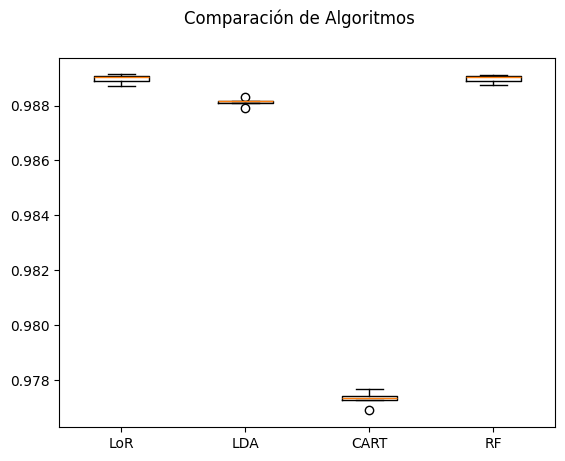

In [77]:
#Vamos a comparar los diferentes algoritmos en un diagrama d e cajas
fig = plt.figure()
fig.suptitle("Comparación de Algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,shuffle=True)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (800000, 46)
Shape of X_test: (200000, 46)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


Comienzo a hacer matrices de confusión con cada uno de los modelos.

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
def mostrar_resultados(y_test, pred_y):
    plt.figure(figsize=(8, 8))
    conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, pred_y,normalize='true', values_format='.2f')
    #plt.figure(figsize=(8, 8))
    #sns.heatmap(conf_matrix, annot=True);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

confusion matrix of: {LogisticRegression()}


<Figure size 800x800 with 0 Axes>

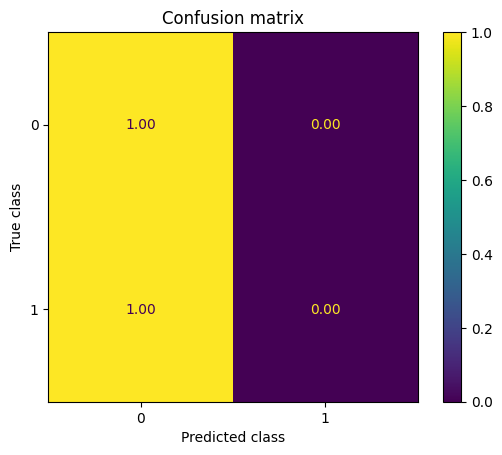

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.00      0.00      0.00      2195

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {LinearDiscriminantAnalysis()}


<Figure size 800x800 with 0 Axes>

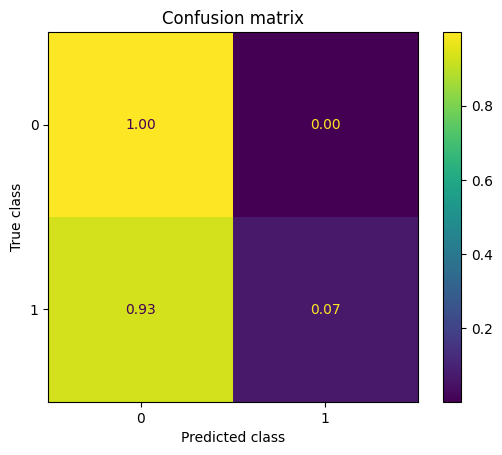

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.34      0.07      0.12      2195

    accuracy                           0.99    200000
   macro avg       0.67      0.53      0.56    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {DecisionTreeClassifier()}


<Figure size 800x800 with 0 Axes>

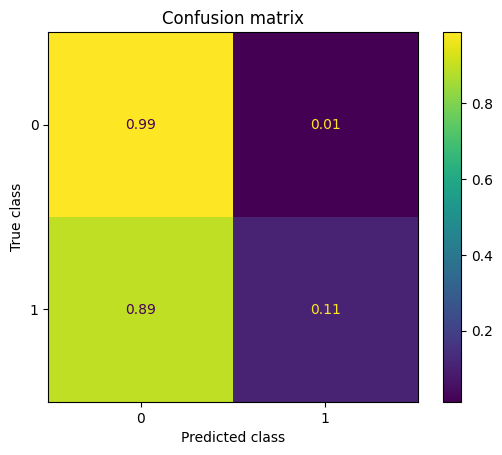

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.08      0.11      0.09      2195

    accuracy                           0.98    200000
   macro avg       0.54      0.55      0.54    200000
weighted avg       0.98      0.98      0.98    200000

confusion matrix of: {GaussianNB()}


<Figure size 800x800 with 0 Axes>

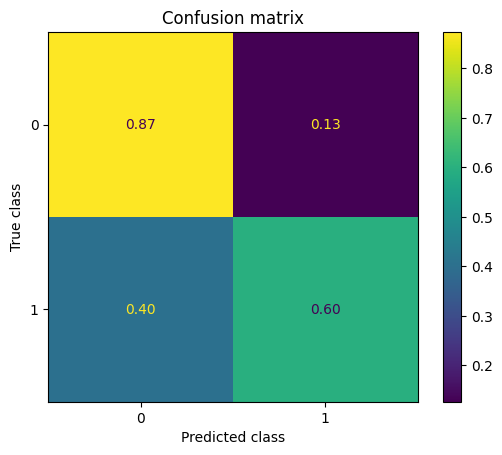

              precision    recall  f1-score   support

           0       0.99      0.87      0.93    197805
           1       0.05      0.60      0.09      2195

    accuracy                           0.87    200000
   macro avg       0.52      0.74      0.51    200000
weighted avg       0.98      0.87      0.92    200000

confusion matrix of: {RandomForestClassifier()}


<Figure size 800x800 with 0 Axes>

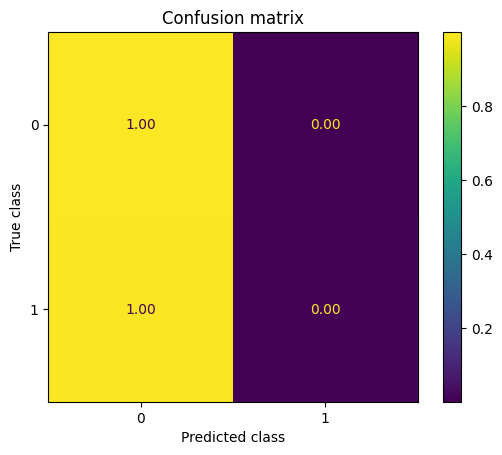

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.69      0.00      0.01      2195

    accuracy                           0.99    200000
   macro avg       0.84      0.50      0.50    200000
weighted avg       0.99      0.99      0.98    200000



In [72]:
for name,model in models:
    model.fit(train_encoded,y_train)
    pred_y = model.predict(test_encoded)
    print("confusion matrix of:",{model})
    mostrar_resultados(y_test, pred_y)

Como tardó mucho en entrenar el dato procedo a guardarlos en una carpeta

In [73]:
model = DecisionTreeClassifier()
model.fit(train_encoded,y_train)

DecisionTreeClassifier()

<Figure size 800x800 with 0 Axes>

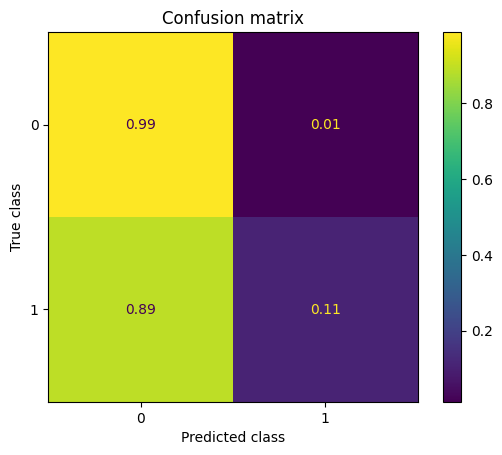

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.09      0.11      0.10      2195

    accuracy                           0.98    200000
   macro avg       0.54      0.55      0.54    200000
weighted avg       0.98      0.98      0.98    200000



In [77]:
pred_y = model.predict(test_encoded)
mostrar_resultados(y_test,pred_y)

In [78]:
# importo librería para guardar modelos
import pickle

In [80]:
# guardo modelo entrenado en formato pickle
with open('../models/DecissionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(model, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [82]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
CART = pickle.load(open('../models/DecissionTreeClassifier.pkl','rb'))

In [83]:
# verifico que el objeto se cargó correctamente
CART

DecisionTreeClassifier()

In [84]:
# verifico que funciona ok el predict
y_pred_CART = CART.predict(test_encoded)
y_pred_CART

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
# importo librería para guardar modelos
import pickle

In [92]:
# guardo modelo entrenado en formato pickle
with open('../models/LinearDiscriminantAnalisis.pkl', 'wb') as f:
    pickle.dump(model, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [20]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
linear_discriminant_analysis = pickle.load(open('../models/LinearDiscriminantAnalisis.pkl','rb'))

In [21]:
# verifico que el objeto se cargó correctamente
linear_discriminant_analysis

LinearDiscriminantAnalysis()

In [22]:
# verifico que funciona ok el predict
y_pred_lda = linear_discriminant_analysis.predict(X_test)
y_pred_lda

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Por último, como vimos que el conjunto de datos estaba desbalanceado, haremos uso de la librería SMOTE para hacer over sampling y mejorar el recalll y el f1-Score

In [100]:
X_train=train_encoded
X_test=test_encoded

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123,sampling_strategy=0.25)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X_train.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

X antes de SMOTE: {(800000, 45)}
X despues de SMOTE: {(988957, 45)}


In [92]:
print("Balance positivo y negativo de las clases:")
y_sm.value_counts(normalize=True)*100

Balance positivo y negativo de las clases:


fraud_bool
0    80.00004
1    19.99996
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Datos balanceados')

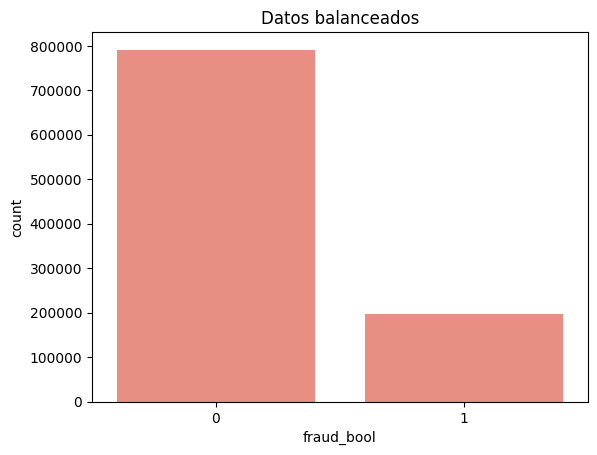

In [93]:
sns.countplot(x=y_sm,color="salmon")
plt.title("Datos balanceados")

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score

model_sm = LinearDiscriminantAnalysis()
model_sm.fit(X_train,y_train)
predicts = model_sm.predict(X_test)

In [ ]:
predictions= linear_discriminant_analysis(X_train)

In [30]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predicts)
recall = recall_score(y_test, predicts)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.99
Recall = 0.07



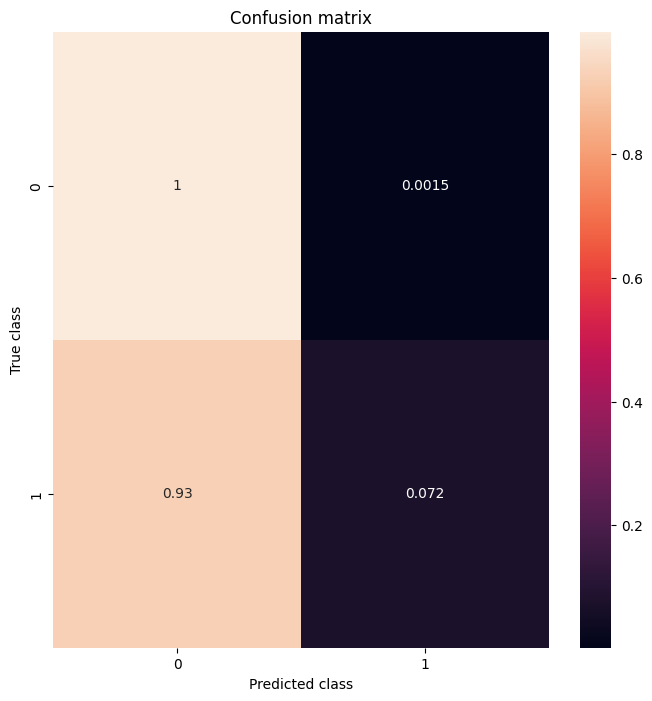

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296652
           1       0.35      0.07      0.12      3348

    accuracy                           0.99    300000
   macro avg       0.67      0.54      0.56    300000
weighted avg       0.98      0.99      0.98    300000



In [33]:
mostrar_resultados(y_test, predicts)

Vemos que el Random Forest dan casi 0 en reccall y f1 score

Guardamos el modelo over sampled

In [50]:
# importo librería para guardar modelos
import pickle

In [51]:
# guardo modelo entrenado en formato pickle
with open('../models/random_forest_sampling.pkl', 'wb') as f:
    pickle.dump(model_sm, f) # dump es la función para guardar el objeto model (rf entrenado)

In [52]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
random_forest_sm = pickle.load(open('../models/random_forest_sampling.pkl','rb'))

In [53]:
# verifico que el objeto se cargó correctamente
random_forest_sm 

RandomForestClassifier(random_state=123)

In [54]:
# verifico que funciona ok el predict
y_pred_rf = random_forest_sm.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123,sampling_strategy=0.25)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X_train.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

In [102]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

In [105]:
from sklearn.linear_model import LogisticRegression

CART.fit(X_train_sm,y_train_sm)
predicts = CART.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, predicts)
recall = recall_score(y_test, predicts)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.97
Recall = 0.12



<Figure size 800x800 with 0 Axes>

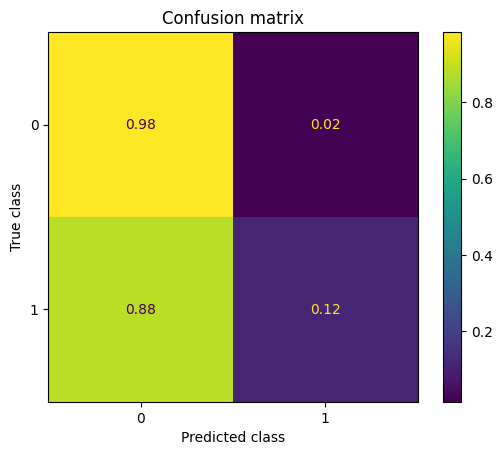

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    197805
           1       0.08      0.12      0.09      2195

    accuracy                           0.97    200000
   macro avg       0.53      0.55      0.54    200000
weighted avg       0.98      0.97      0.98    200000



In [107]:
mostrar_resultados(y_test, predicts)

### ESTO ES LO QUE VALE

In [191]:
### Parameter Tunning Optimization
param_grid={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[8,9,10,11,12],
    'max_features':['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(CART, param_grid, cv=10, random_state=12345, n_jobs=2)
                  
CV.fit(X_train_sm, y_train_sm)  
print(CV.best_params_)    
print(CV.best_score_)

{'splitter': 'best', 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
0.9411576572841925


In [192]:
#Mostramos los mejores parámetros encontrados por pantalla
print(f"Mejores parámetros: {CV.best_params_}")

Mejores parámetros: {'splitter': 'best', 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [193]:
predictions = CV.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.98
Recall = 0.14



<Figure size 800x800 with 0 Axes>

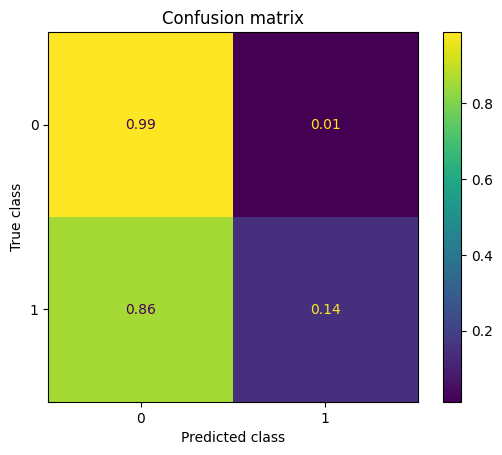

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.11      0.14      0.13      2195

    accuracy                           0.98    200000
   macro avg       0.55      0.57      0.56    200000
weighted avg       0.98      0.98      0.98    200000



In [195]:
mostrar_resultados(y_test, predictions)

In [200]:
Best_CART = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 'log2', splitter = 'best', max_leaf_nodes = None)
Best_CART.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [201]:
predictions = best_CART.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.98
Recall = 0.14



<Figure size 800x800 with 0 Axes>

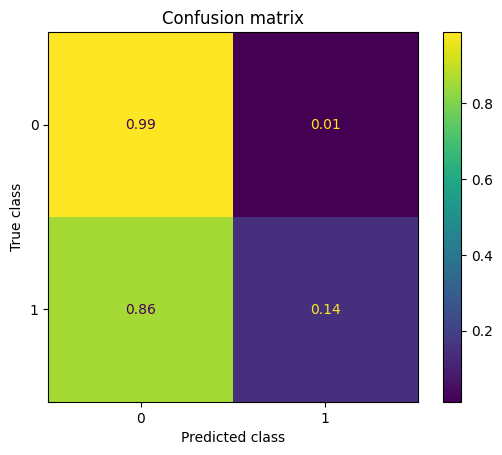

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.11      0.14      0.13      2195

    accuracy                           0.98    200000
   macro avg       0.55      0.57      0.56    200000
weighted avg       0.98      0.98      0.98    200000



In [203]:
mostrar_resultados(y_test,predictions)

### IMPORTAMOS EL MODELO PARA EL FUTURO

In [196]:
import pickle

In [204]:
# guardo modelo entrenado en formato pickle
with open('../models/best_CART.pkl', 'wb') as f:
    pickle.dump(Best_CART, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [205]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
best_CART = pickle.load(open('../models/best_CART.pkl','rb'))

In [206]:
# verifico que el objeto se cargó correctamente
best_CART

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

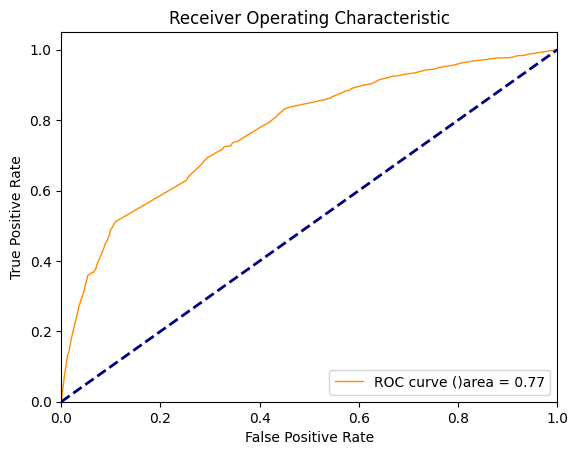

In [209]:
#PROCEDEMOS A HACER EL AREA BAJO LA CURVA
from sklearn.metrics import roc_curve, auc
#Predecir las probabilidades para los conjuntos de prueba
y_pred_prob = best_CART.predict_proba(X_test)[:,1]

#Calcular la curva ROC
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

#Calcular el AUC
roc_auc = auc(fpr, tpr)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=1, label='ROC curve ()area = %0.2f'
        % roc_auc)
plt.plot([0,1],[0,1], color='navy',
         lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

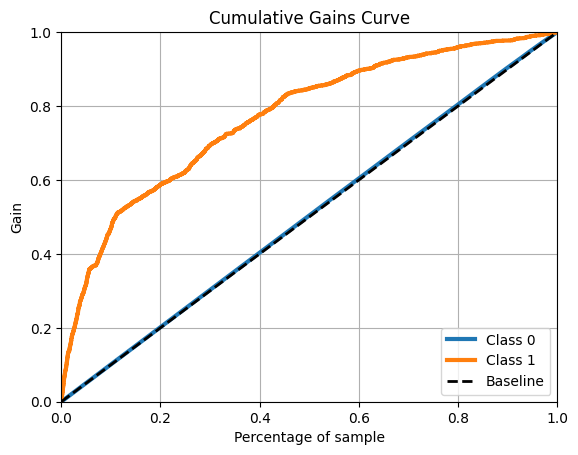

In [208]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
predict_proba = best_CART.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predict_proba)
plt.show()

# EXPLICABILIDAD DEL MODELO

In [210]:
import shap

In [211]:
shap.initjs()

In [212]:
explainer = shap.TreeExplainer(best_CART,X_train_sm)

In [213]:
shap_values = explainer.shap_values(X_test)

 99%|===================| 397706/400000 [00:53<00:00]        

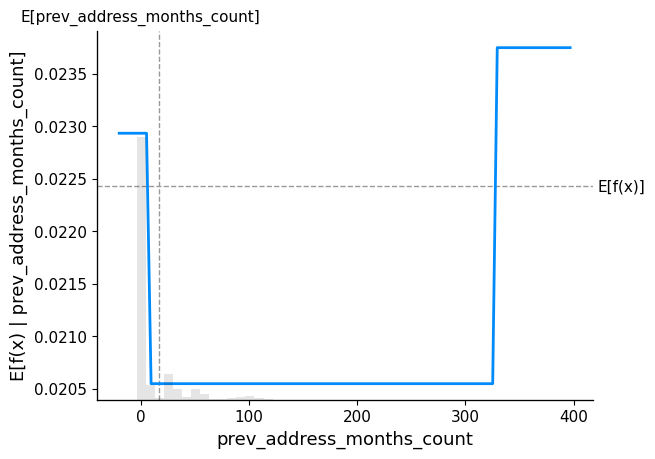

In [216]:
shap.partial_dependence_plot(
    "prev_address_months_count",
    best_CART.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [217]:
explainer.expected_value

array([0.80019685, 0.19980315])

In [220]:
shap_values[0][:,0]

array([ 8.75753351e-06,  5.55618465e-03,  2.29249211e-03, -1.17075693e-03,
        1.69214251e-03,  0.00000000e+00, -1.57662830e-02, -2.38698139e-05,
       -6.57630842e-04, -9.59559157e-04,  1.99683476e-05, -1.60678982e-03,
        1.60003193e-04, -9.90770034e-03, -2.29801208e-03, -3.02969106e-05,
        0.00000000e+00, -7.68229626e-04, -2.56151495e-02,  0.00000000e+00,
       -8.52459110e-06,  8.66860259e-02, -2.43447416e-02, -3.52002778e-03,
       -1.01847709e-02,  0.00000000e+00, -1.95162243e-02,  4.19636991e-02,
        1.00547455e-02,  0.00000000e+00,  9.10450757e-03,  0.00000000e+00,
        0.00000000e+00,  1.35069942e-01,  1.06960067e-01, -1.06929056e-01,
        0.00000000e+00,  2.09272433e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.29510356e-04,  2.35730935e-03,  2.55393126e-04,
        1.34031822e-02])

In [222]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[0,:])

In [273]:
shap.force_plot(explainer.expected_value[0], shap_values[234][:,0], X_test.iloc[234, :])

In [234]:
shap.force_plot(explainer.expected_value[0], shap_values[777][:,0], X_test.iloc[777, :])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[33, :], X_test.iloc[33, :])

In [239]:
shap_values[xs]

0.19980314829148946

In [342]:
shap.force_plot(explainer.expected_value, matriz[:100,:], features=X_test.iloc[:100, :])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

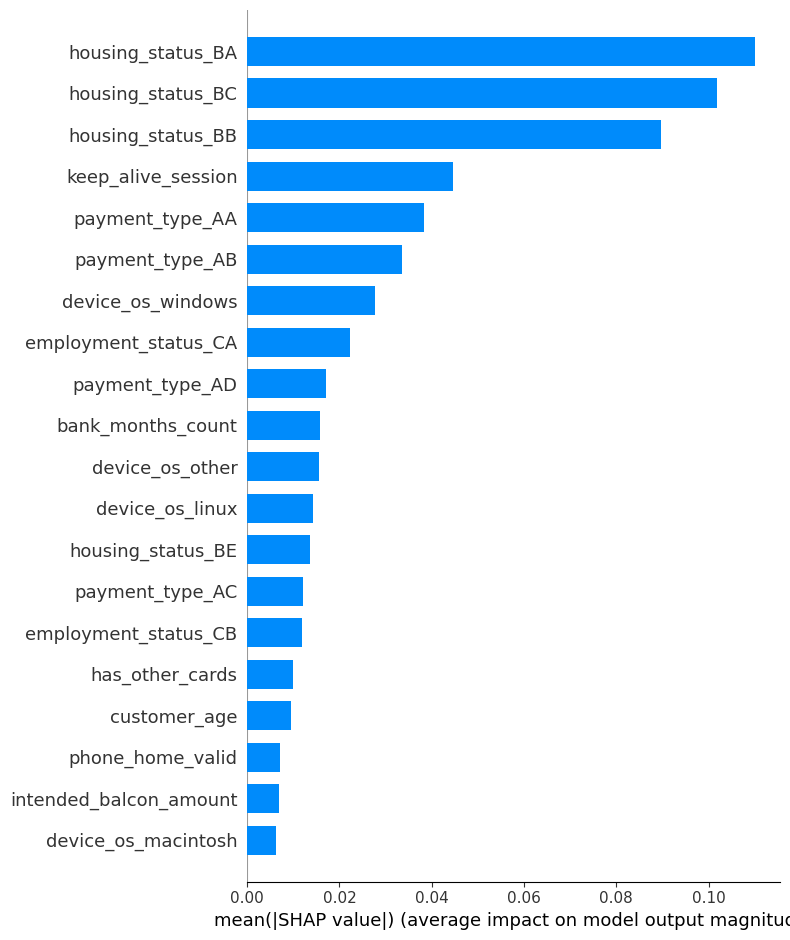

In [336]:
shap.summary_plot(matriz, X_test,plot_type='bar')

In [330]:
shap_values[1][:,0][2]

0.01246796602383256

In [327]:
shap_values

array([[[ 8.75753351e-06, -8.75752652e-06],
        [ 5.55618465e-03, -5.55617591e-03],
        [ 2.29249211e-03, -2.29248929e-03],
        ...,
        [ 2.35730935e-03, -2.35730909e-03],
        [ 2.55393126e-04, -2.55391667e-04],
        [ 1.34031822e-02, -1.34031816e-02]],

       [[ 1.77309709e-04, -1.77309794e-04],
        [ 6.18770821e-03, -6.18770684e-03],
        [ 1.24679660e-02, -1.24679630e-02],
        ...,
        [ 2.45991359e-04, -2.45991265e-04],
        [ 1.73705169e-03, -1.73705282e-03],
        [ 1.14984059e-02, -1.14984054e-02]],

       [[ 8.40506703e-05, -8.40507084e-05],
        [ 5.68711466e-03, -5.68711363e-03],
        [ 1.44001231e-02, -1.44001205e-02],
        ...,
        [ 1.06562953e-04, -1.06562873e-04],
        [ 4.52369960e-03, -4.52370270e-03],
        [ 3.39537111e-02, -3.39537121e-02]],

       ...,

       [[ 6.64429553e-05, -6.64429827e-05],
        [ 2.94222057e-03, -2.94222072e-03],
        [ 8.17344954e-03, -8.17345000e-03],
        ...,
     

In [320]:
shap_values.shape

(200000, 45, 2)

In [333]:
filas=200000
columnas=45
matriz=np.empty((filas,columnas))
for i in range(filas):
    for j in range(columnas):
        matriz[i,j] = shap_values[i][:,0][j]

In [334]:
matriz.shape

(200000, 45)

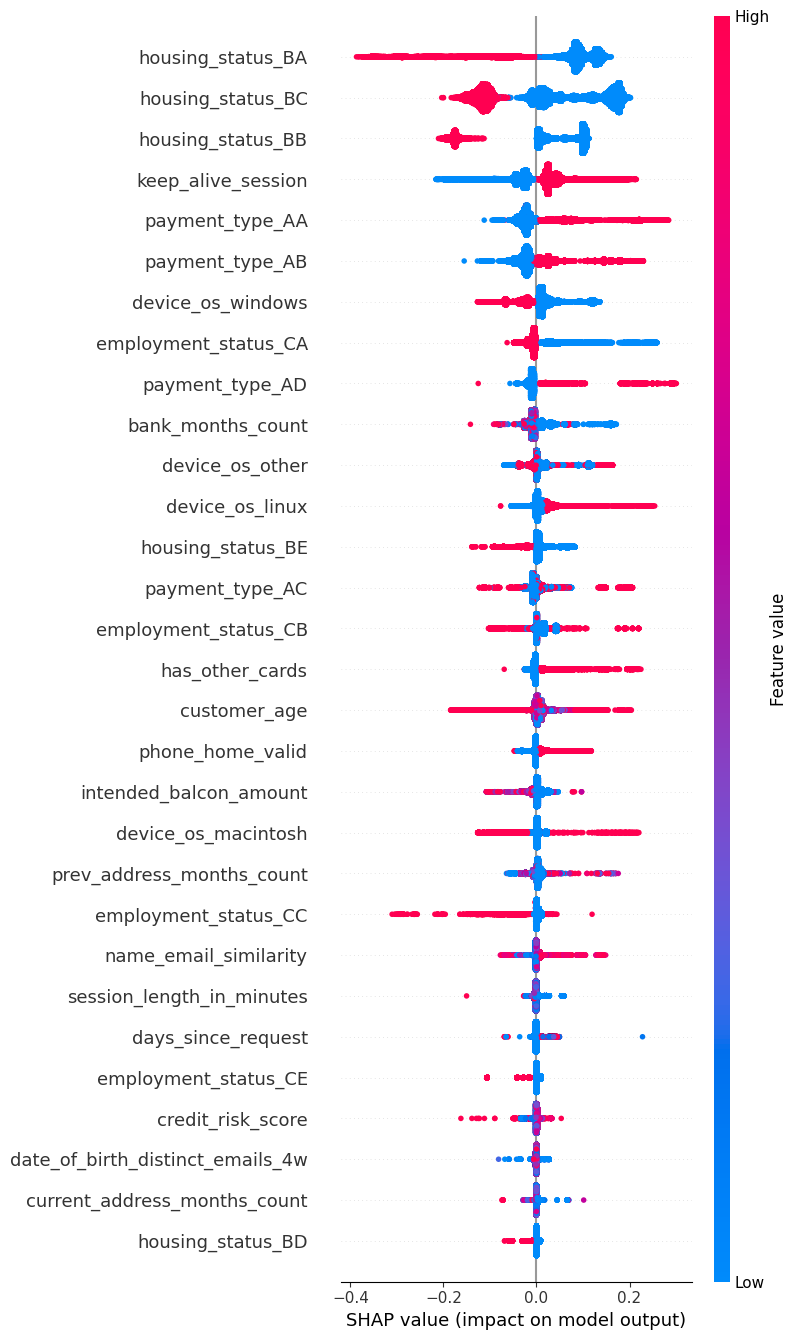

In [335]:
shap.summary_plot(matriz, features=X_test, max_display=30)

In [243]:
y_proba = best_CART.predict_proba(X_test)

In [244]:
y_proba

array([[0.99519586, 0.00480414],
       [0.99873123, 0.00126877],
       [0.99450968, 0.00549032],
       ...,
       [0.99242424, 0.00757576],
       [1.        , 0.        ],
       [0.99561442, 0.00438558]])

In [245]:
y_pred_proba = y_proba[:, 1]

In [246]:
y_pred_proba

array([0.00480414, 0.00126877, 0.00549032, ..., 0.00757576, 0.        ,
       0.00438558])

In [247]:
df_proba = pd.concat([pd.Series(y_pred_proba),pd.Series(y_test.reset_index(drop=True))], axis=1)

In [248]:
df_proba.describe().T

count      mean       std  min       25%       50%      75%  \
0           200000.0  0.056767  0.130094  0.0  0.004386  0.013168  0.08075   
fraud_bool  200000.0  0.010975  0.104185  0.0  0.000000  0.000000  0.00000   

            max  
0           1.0  
fraud_bool  1.0

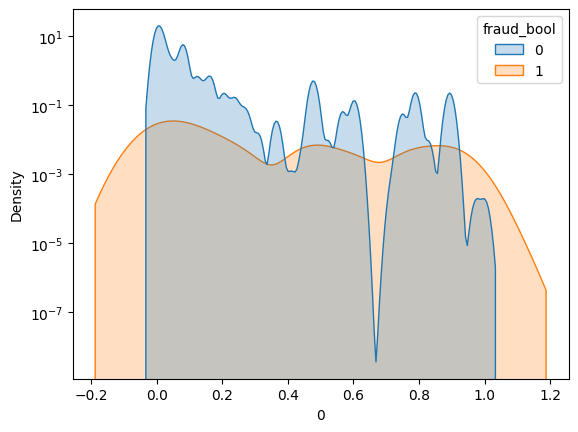

In [249]:
sns.kdeplot(data=df_proba,x=0,hue='fraud_bool',fill=True)
plt.yscale('log')  

# A PARTIR DE AQUÍ NO ME SIRVE NADA

En este caso recall y f1 score es 0 además podemos ver en la matriz de confusión que siempre que predice, dice que no es fraude luego no es un buen modelo en este caso el de regresión logística.

In [16]:
#Vamos a probar ahora con LinealCiscriminantAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

X antes de SMOTE: {(1000000, 46)}
X despues de SMOTE: {(1384638, 46)}


In [15]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_LDA_sm = LinearDiscriminantAnalysis()
model_LDA_sm.fit(X_train_sm,y_train_sm)
predicts = model_LDA_sm.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, predicts)
recall = recall_score(y_test, predicts)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.84
Recall = 0.64



<Figure size 800x800 with 0 Axes>

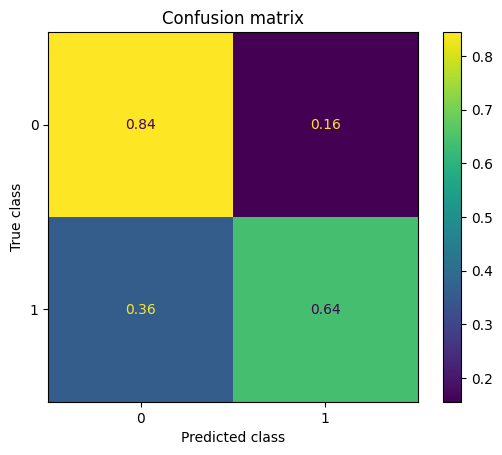

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    296652
           1       0.04      0.64      0.08      3348

    accuracy                           0.84    300000
   macro avg       0.52      0.74      0.50    300000
weighted avg       0.98      0.84      0.90    300000



In [18]:
mostrar_resultados(y_test, predicts)

In [ ]:
Por último LDA es el único que me da un valor distinto de 0 de f1 aún asi es un valor muy bajo y habría que mejorarlo. Procedo a guardar el modelo en carpeta.

In [94]:
# importo librería para guardar modelos
import pickle

In [40]:
# guardo modelo entrenado en formato pickle
with open('../models/Linear_Discriminant_Analysis_sampling.pkl', 'wb') as f:
    pickle.dump(model_LDA_sm, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [21]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
LDA_sm = pickle.load(open('../models/Linear_Discriminant_Analysis_sampling.pkl','rb'))

In [22]:
# verifico que el objeto se cargó correctamente
LDA_sm 

LinearDiscriminantAnalysis()

In [23]:
# verifico que funciona ok el predict
y_pred_LDA_sm = LDA_sm.predict(X_test)
y_pred_LDA_sm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Decido utilizar este modelo para predecir los fraudes y emmpiezo a entrenarlo.

In [97]:
from sklearn.model_selection import GridSearchCV
#Definimos los parametros para la búsqueda en cuadrícula
params_grid={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[4,5,6,7,8],
    'max_features':[5, 'sqrt', 'log2']
}

#Creamos la búsqueda en cuadrícula con validación cruzada
grid_search= GridSearchCV(CART,param_grid=params_grid,cv=5)


In [46]:
#Mostramos los mejores parámetros encontrados por pantalla
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'n_components': 1, 'shrinkage': None, 'solver': 'svd', 'tol': 0.0001}


In [29]:
best_LDA=LinearDiscriminantAnalysis(n_components=1,shrinkage=None,solver='svd',tol=0.0001)
best_LDA.fit(X_train_sm,y_train_sm)

LinearDiscriminantAnalysis(n_components=1)

In [30]:
prediction = best_LDA.predict(X_test)

<Figure size 800x800 with 0 Axes>

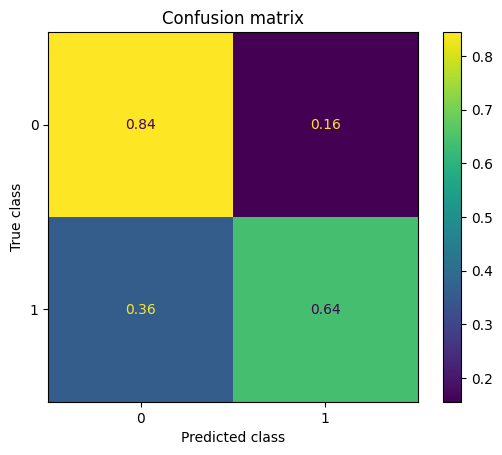

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    296652
           1       0.04      0.64      0.08      3348

    accuracy                           0.84    300000
   macro avg       0.52      0.74      0.50    300000
weighted avg       0.98      0.84      0.90    300000



In [31]:
mostrar_resultados(y_test,prediction)

Voy a probar cosas raras

In [10]:
import pickle

In [95]:
# guardo modelo entrenado en formato pickle
with open('../models/best_LDA.pkl', 'wb') as f:
    pickle.dump(model_LDA_sm, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [11]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
best_LDA = pickle.load(open('../models/best_LDA.pkl','rb'))

In [12]:
# verifico que el objeto se cargó correctamente
best_LDA

LinearDiscriminantAnalysis()

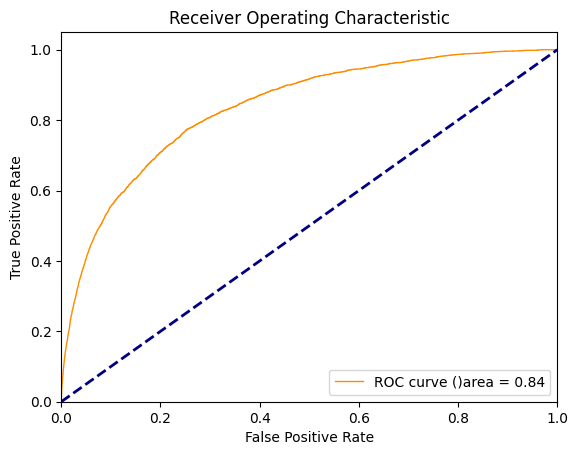

In [32]:
#PROCEDEMOS A HACER EL AREA BAJO LA CURVA
from sklearn.metrics import roc_curve, auc
#Predecir las probabilidades para los conjuntos de prueba
y_pred_prob = best_LDA.predict_proba(X_test)[:,1]

#Calcular la curva ROC
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

#Calcular el AUC
roc_auc = auc(fpr, tpr)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=1, label='ROC curve ()area = %0.2f'
        % roc_auc)
plt.plot([0,1],[0,1], color='navy',
         lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

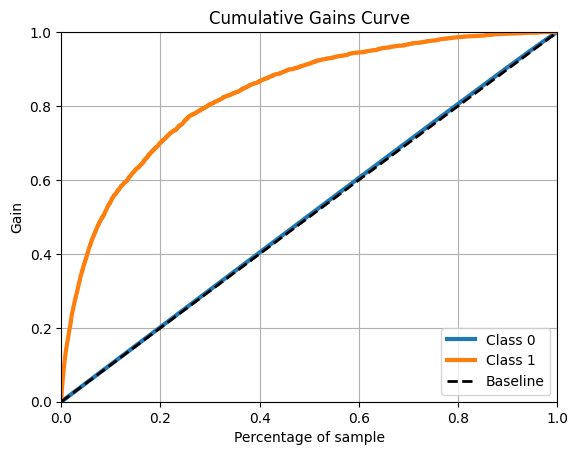

In [34]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
predict_proba = best_LDA.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predict_proba)
plt.show()

In [71]:
!pip install shap

# Explicabilidad del Modelo

In [141]:
import shap

In [142]:
shap.initjs()

In [143]:
explainer = shap.LinearExplainer(best_LDA,X_train_sm)

In [144]:
shap_values = explainer.shap_values(X_test)

In [145]:
shap_values

array([[-0.6534476 , -0.71840423,  0.1912989 , ..., -0.00225722,
        -0.49062359, -0.24374318],
       [-0.02074199, -0.6831933 ,  0.1912989 , ..., -0.00225722,
         0.27747426, -0.24374318],
       [-0.52690648, -0.70544744,  0.1912989 , ..., -0.00225722,
         0.27747426, -0.24374318],
       ...,
       [-0.27382424, -0.47748535,  0.1912989 , ..., -0.00225722,
         0.27747426, -0.24374318],
       [-0.02074199, -0.73521885,  0.1912989 , ..., -0.00225722,
        -0.49062359, -0.24374318],
       [-0.52690648, -0.33778847,  0.06079368, ..., -0.00225722,
        -0.49062359, -0.24374318]])

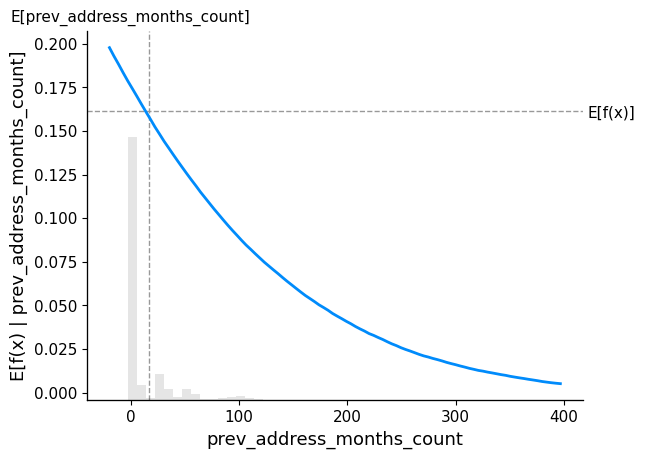

In [146]:
shap.partial_dependence_plot(
    "prev_address_months_count",
    best_LDA.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [147]:
explainer.expected_value

-1.3085858274931579

In [156]:
shap_values[0,:]

array([-6.53447597e-01, -7.18404235e-01,  1.91298903e-01, -7.65220786e-04,
        1.60240146e-01, -1.03451926e-02, -3.38905071e-01, -5.80910343e-02,
       -2.00385054e-01,  4.61356550e-01, -2.07784498e-01,  1.63007203e-01,
        6.95702679e-01, -1.49873865e-01,  2.05555692e-01,  2.89025984e-01,
       -2.76316048e-02, -0.00000000e+00,  1.33460243e-02,  1.16373587e+00,
        1.31386215e-02,  1.37588686e-01, -1.45063185e-01,  6.37720841e-02,
       -1.45138575e-01,  9.12029819e-03, -0.00000000e+00,  5.32347644e-02,
        3.38908711e-02, -7.83602775e-03,  1.01089223e-02,  2.87996116e-02,
        5.44063846e-03, -0.00000000e+00, -2.38088808e-01,  8.40948126e-02,
       -2.63564506e-01, -2.32059405e-03,  1.73005342e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.65348263e-01, -2.25721561e-03,
       -4.90623590e-01, -2.43743178e-01])

In [150]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [151]:
shap.force_plot(explainer.expected_value, shap_values[100, :], X_test.iloc[100, :])

In [86]:
shap.force_plot(explainer.expected_value, shap_values[33, :], X_test.iloc[33, :])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [66]:
explainer.expected_value

0.37467966080780934

In [87]:
shap.force_plot(explainer.expected_value, shap_values[:100,:], features=X_test.iloc[:100, :])

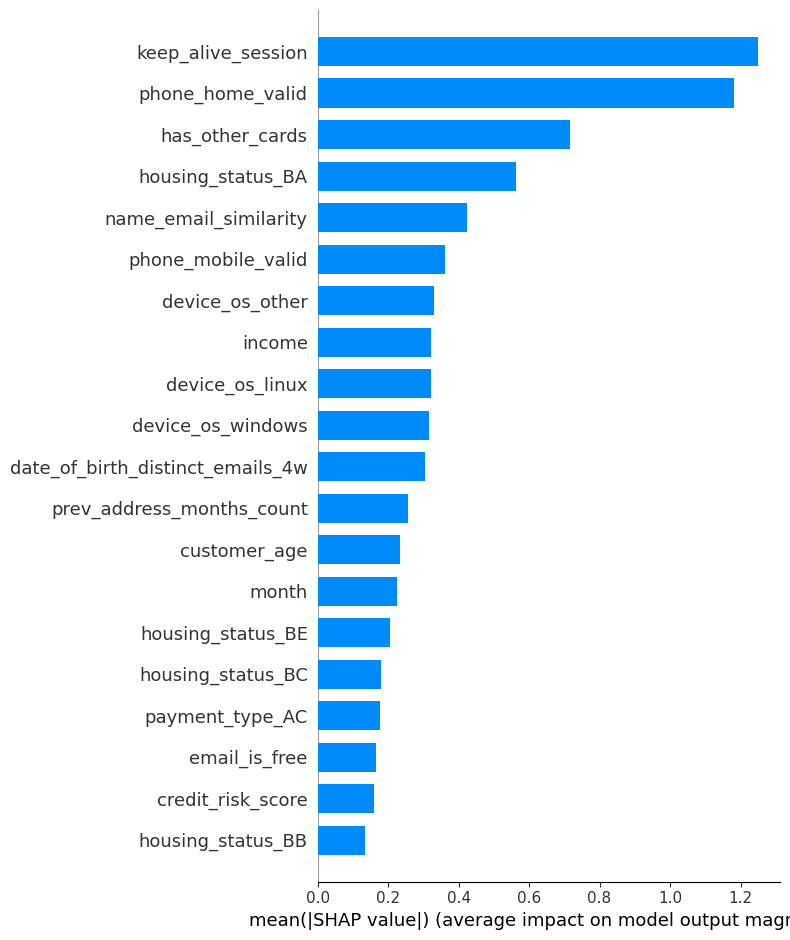

In [92]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

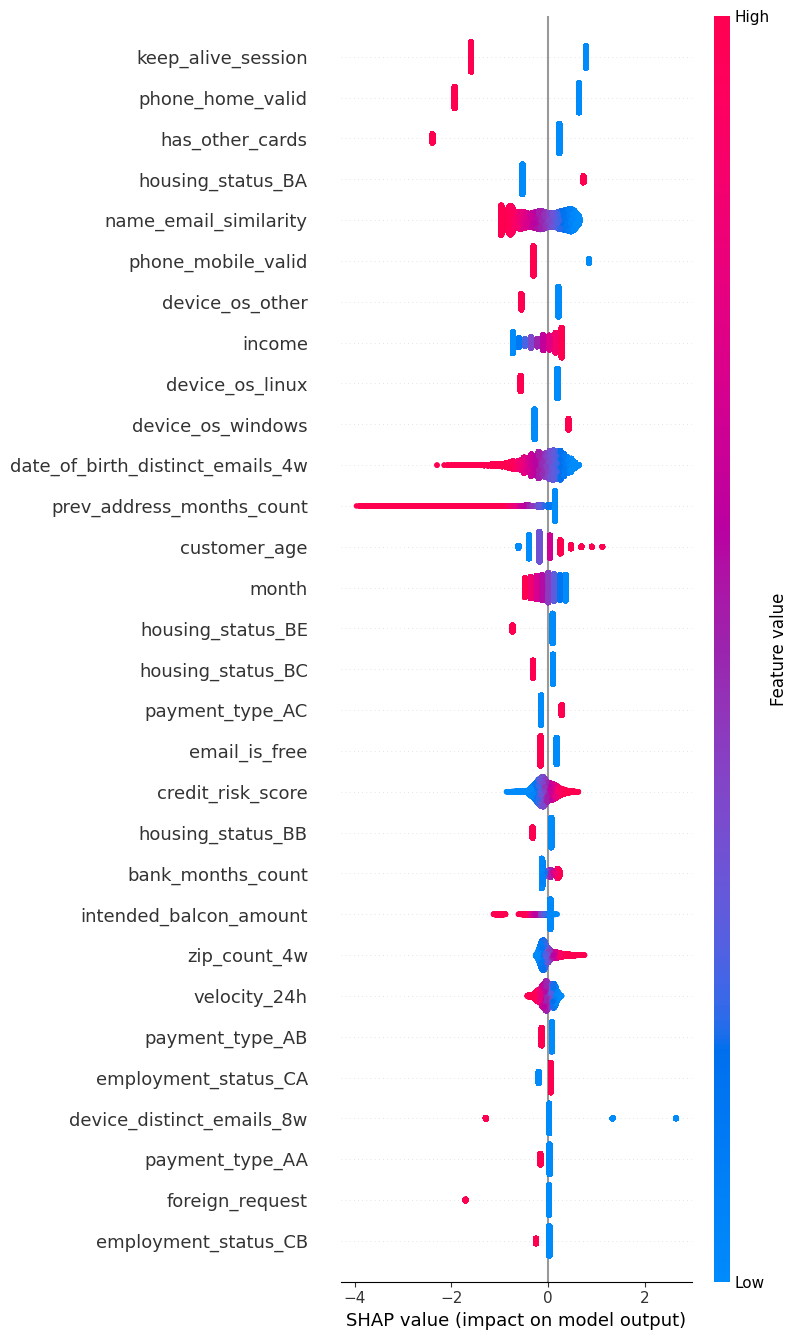

In [93]:
shap.summary_plot(shap_values, features=X_test, max_display=30)

In [17]:
y_proba = best_LDA.predict_proba(X_test)

In [18]:
y_proba

array([[0.74876622, 0.25123378],
       [0.97171281, 0.02828719],
       [0.99784894, 0.00215106],
       ...,
       [0.62523985, 0.37476015],
       [0.99387413, 0.00612587],
       [0.98423273, 0.01576727]])

In [19]:
y_pred_proba = y_proba[:, 1]

In [20]:
y_pred_proba

array([0.25123378, 0.02828719, 0.00215106, ..., 0.37476015, 0.00612587,
       0.01576727])

In [24]:
df_proba = pd.concat([pd.Series(y_pred_proba),pd.Series(y_test.reset_index(drop=True))], axis=1)

In [26]:
df_proba.describe().T

count      mean       std           min       25%       50%  \
0           300000.0  0.204133  0.273307  3.311410e-07  0.012423  0.065675   
fraud_bool  300000.0  0.011160  0.105050  0.000000e+00  0.000000  0.000000   

                 75%       max  
0           0.300562  0.999813  
fraud_bool  0.000000  1.000000

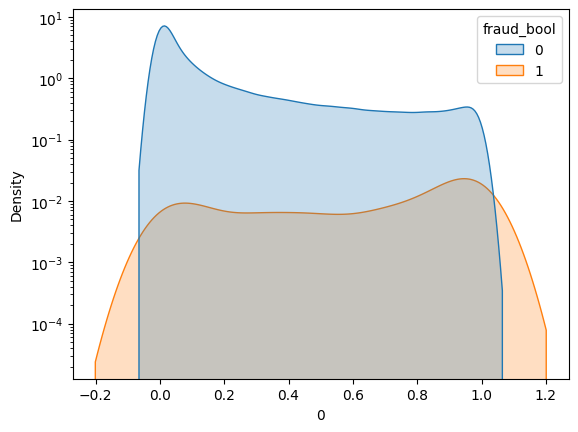

In [31]:
sns.kdeplot(data=df_proba,x=0,hue='fraud_bool',fill=True)
plt.yscale('log')  

In [33]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
rf_sm = pickle.load(open('../models/random_forest_sampling.pkl','rb'))

In [34]:
rf_sm

RandomForestClassifier(random_state=123)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,shuffle=True)


In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123,sampling_strategy=0.25)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

X antes de SMOTE: {(1000000, 46)}
X despues de SMOTE: {(988957, 46)}


In [38]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

In [43]:
### Parameter Tunning Optimization
param_grid = { 
    'n_estimators': [10], # poner tantos como se quiera probar
    'max_features': ['auto', 'sqrt', 'log2'], #['auto', 'sqrt', 'log2']
    'max_depth' : [4,5,6,7], # [4,5,6,7,8]
    'criterion' :['gini', 'entropy']} #['gini', 'entropy']

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(rf_sm, param_grid, cv=10, random_state=12345, n_jobs=2)
                  
CV.fit(X_train_sm, y_train_sm)  
print(CV.best_params_)    
print(CV.best_score_)

{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini'}
0.9632036307433471


In [46]:
predictions = CV.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.98
Recall = 0.15



<Figure size 800x800 with 0 Axes>

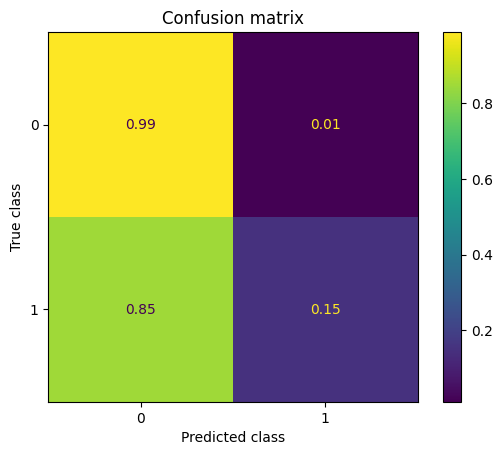

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.13      0.15      0.14      2195

    accuracy                           0.98    200000
   macro avg       0.56      0.57      0.56    200000
weighted avg       0.98      0.98      0.98    200000



In [50]:
mostrar_resultados(y_test, predictions)

In [51]:
CV

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10]},
                   random_state=12345)

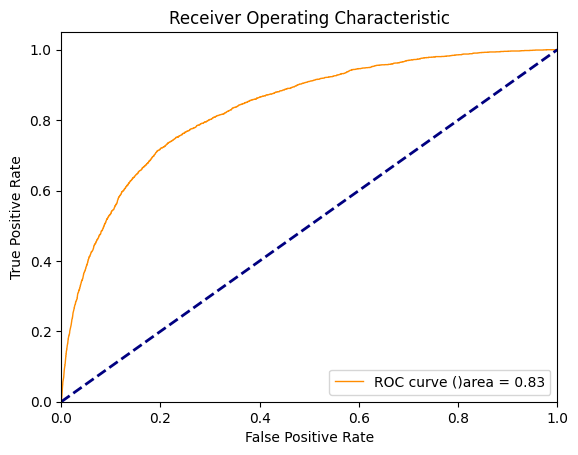

In [52]:
#PROCEDEMOS A HACER EL AREA BAJO LA CURVA
from sklearn.metrics import roc_curve, auc
#Predecir las probabilidades para los conjuntos de prueba
y_pred_prob = CV.predict_proba(X_test)[:,1]

#Calcular la curva ROC
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

#Calcular el AUC
roc_auc = auc(fpr, tpr)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=1, label='ROC curve ()area = %0.2f'
        % roc_auc)
plt.plot([0,1],[0,1], color='navy',
         lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

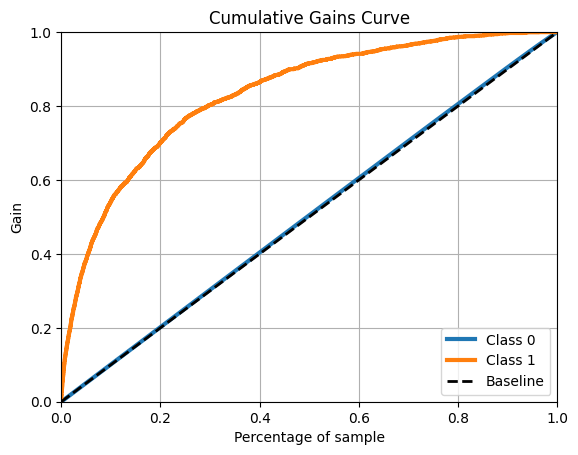

In [53]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
predict_proba = best_LDA.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predict_proba)
plt.show()

In [283]:
CV.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=123)

In [284]:
rf_sm

RandomForestClassifier(random_state=123)

# Explicabilidad del Modelo


In [157]:
import shap

In [159]:
shap.initjs()

In [285]:
explainer = shap.TreeExplainer(rf_sm)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [175]:
shap_values

array([[[ 5.94430827e-04, -5.94430827e-04],
        [ 1.82314928e-03, -1.82314928e-03],
        [-1.68689013e-03,  1.68689013e-03],
        ...,
        [ 2.92282230e-04, -2.92282230e-04],
        [ 4.69073448e-02, -4.69073448e-02],
        [ 5.13076584e-02, -5.13076584e-02]],

       [[-3.71021564e-04,  3.71021564e-04],
        [ 2.46379954e-03, -2.46379954e-03],
        [-2.35254010e-03,  2.35254010e-03],
        ...,
        [ 5.55640060e-05, -5.55640060e-05],
        [-7.31994758e-03,  7.31994758e-03],
        [ 4.37198486e-02, -4.37198486e-02]],

       [[ 1.13019475e-03, -1.13019475e-03],
        [ 1.57758390e-03, -1.57758390e-03],
        [-1.13921434e-03,  1.13921434e-03],
        ...,
        [ 6.28063915e-05, -6.28063915e-05],
        [-9.37662233e-03,  9.37662233e-03],
        [ 5.22957202e-02, -5.22957202e-02]],

       ...,

       [[-2.85908488e-04,  2.85908488e-04],
        [ 1.11732188e-03, -1.11732188e-03],
        [-1.07511640e-03,  1.07511640e-03],
        ...,
     

In [183]:
shap_values[0][:,0]

array([ 5.94430827e-04,  1.82314928e-03, -1.68689013e-03, -8.46354050e-03,
       -1.03852801e-02,  9.29877844e-04, -2.22131919e-02,  1.44924627e-04,
        3.35799484e-05, -1.09253893e-04,  2.63769496e-03, -6.40474549e-06,
       -1.69185185e-02,  2.27324442e-04, -9.95566618e-03, -3.69941770e-03,
        8.26175608e-04,  2.24268422e-07, -7.36374734e-06, -2.95266347e-02,
        1.62559477e-05,  8.26659138e-05,  3.25238594e-02,  9.89181494e-04,
        4.86919516e-02,  7.77656999e-03,  0.00000000e+00, -7.71965186e-04,
       -1.02055091e-03,  7.23854831e-04,  8.78941213e-06,  0.00000000e+00,
       -8.46234468e-06,  9.15351298e-06,  4.93460063e-02, -3.71330595e-03,
        3.41519837e-02,  2.40958036e-05, -3.14766525e-03,  3.39538182e-07,
        0.00000000e+00,  1.60369984e-05, -1.05529129e-02,  2.92282230e-04,
        4.69073448e-02,  5.13076584e-02])

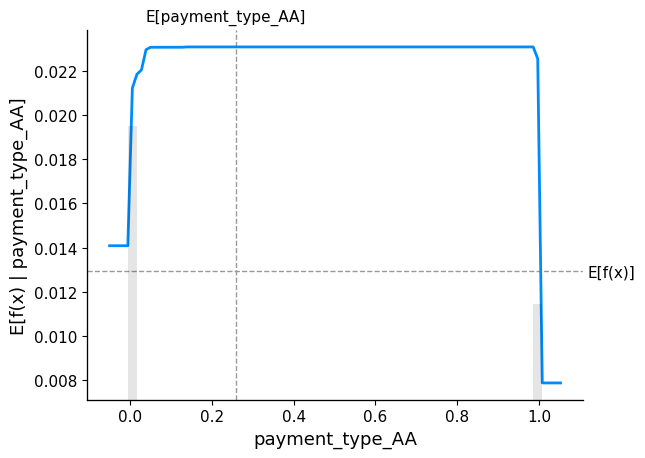

In [69]:
shap.partial_dependence_plot(
    "payment_type_AA",
    CV.best_estimator_.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [131]:
len(explainer.expected_value)

2

In [130]:
len(shap_values[0][0,:])

2

In [132]:
len(X_test.iloc[0, :])

46

In [184]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[0,:])

In [187]:
shap.force_plot(explainer.expected_value[0], shap_values[33][:,0], X_test.iloc[33,:])

In [189]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[33, :], X_test.iloc[33, :])

In [112]:
explainer.expected_value

array([0.79377114, 0.20622886])

In [227]:
len(shap_values[0][:100,:])

46

In [268]:
shap_values[0][:,0]

array([-3.71021564e-04,  2.46379954e-03, -2.35254010e-03,  9.51023561e-03,
        1.64694992e-03,  4.89011305e-04, -1.73081352e-02, -2.20502333e-04,
        3.73257081e-05,  4.38225162e-04,  1.74436627e-03,  1.85729501e-07,
       -1.12484905e-02,  1.48309253e-04, -8.43692114e-03, -1.15112116e-03,
        8.14168119e-04,  4.24971660e-07, -1.97589283e-05,  3.88797966e-02,
        1.42582609e-05,  5.32808684e-06,  5.60419847e-03,  1.71117072e-02,
        3.50369480e-02,  5.10265799e-03,  0.00000000e+00, -3.74256444e-04,
       -1.11006424e-03,  3.14855376e-04,  6.08571313e-06,  0.00000000e+00,
       -1.07700850e-05,  1.36684543e-06,  3.71595633e-02,  3.68382327e-02,
       -1.17987841e-02,  1.84176629e-04, -4.99204469e-03,  1.52857600e-07,
        0.00000000e+00,  5.48177521e-06,  2.03851253e-02,  5.55640060e-05,
       -7.31994758e-03,  4.37198486e-02])

In [272]:
shap.force_plot(explainer.expected_value[0], shap_values[1][:100,:], features=X_test.iloc[:100, :])

IndexError: index 2 is out of bounds for axis 0 with size 2

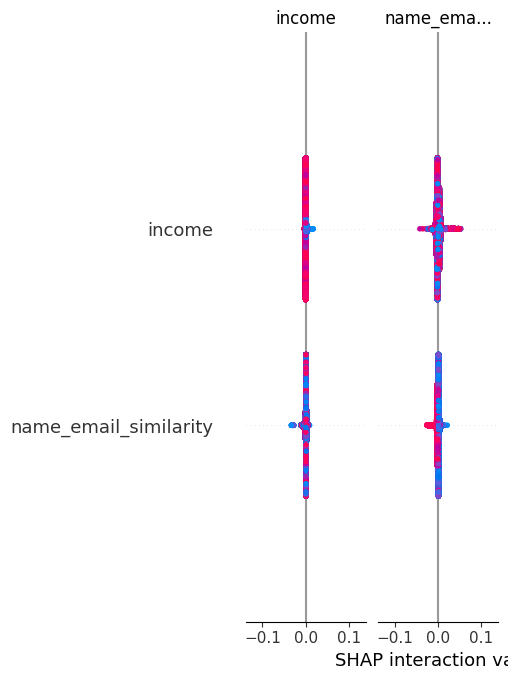

In [282]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

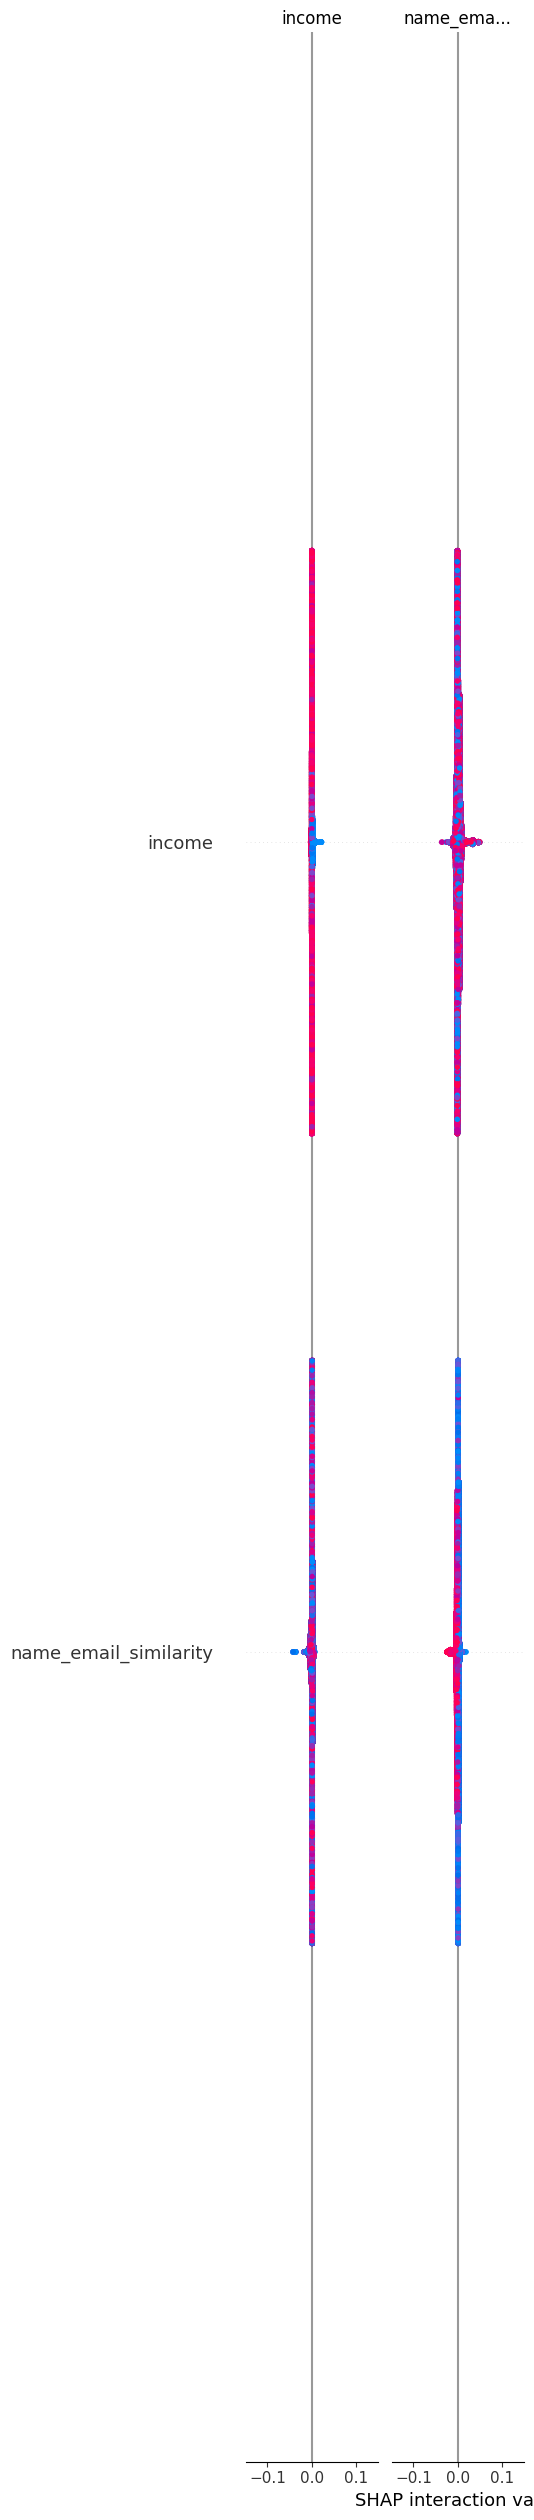

In [115]:
shap.summary_plot(shap_values, features=X_test, max_display=30)

In [116]:
y_proba = CV.best_estimator_.predict_proba(X_test)

In [117]:
y_proba

array([[0.95793795, 0.04206205],
       [0.99104355, 0.00895645],
       [0.99197529, 0.00802471],
       ...,
       [0.98081573, 0.01918427],
       [0.97669247, 0.02330753],
       [0.98068988, 0.01931012]])

In [118]:
y_pred_proba = y_proba[:, 1]

In [119]:
y_pred_proba

array([0.04206205, 0.00895645, 0.00802471, ..., 0.01918427, 0.02330753,
       0.01931012])

In [120]:
df_proba = pd.concat([pd.Series(y_pred_proba),pd.Series(y_test.reset_index(drop=True))], axis=1)

In [121]:
df_proba.describe().T

count      mean       std       min       25%       50%  \
0           200000.0  0.073892  0.104543  0.001333  0.013883  0.032809   
fraud_bool  200000.0  0.010975  0.104185  0.000000  0.000000  0.000000   

                75%       max  
0           0.08734  0.805549  
fraud_bool  0.00000  1.000000

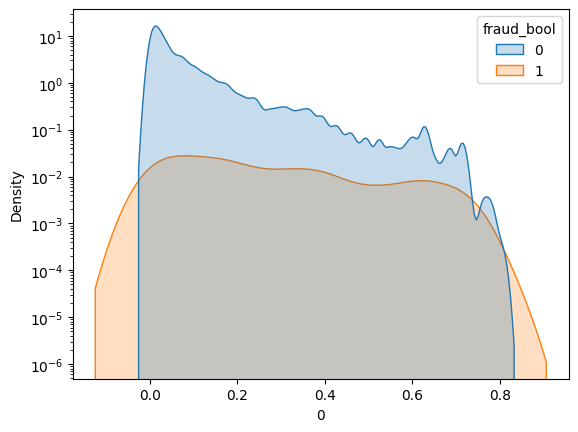

In [122]:
sns.kdeplot(data=df_proba,x=0,hue='fraud_bool',fill=True)
plt.yscale('log')  